In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
from avgn.visualization.projections import scatter_spec
from avgn.utils.general import save_fig
from avgn.utils.paths import FIGURE_DIR, ensure_dir

In [4]:
DATASET_ID = 'swamp_sparrow'

In [5]:
datasets = list((DATA_DIR / 'embeddings' / DATASET_ID / 'indvs').glob('*.pickle'))
datasets = pd.DataFrame([[i.parent.stem, i.stem, i] for i in datasets], columns = ['ds', 'indv', '_loc'])

In [6]:
datasets[:3]

ds           indv                                               _loc
0  indvs        MIWAT38  /mnt/cube/tsainbur/Projects/github_repos/avgn_...
1  indvs   NYADIRAQSI30  /mnt/cube/tsainbur/Projects/github_repos/avgn_...
2  indvs  PAGeneva08-47  /mnt/cube/tsainbur/Projects/github_repos/avgn_...

In [7]:
syllable_df = pd.read_pickle(datasets.iloc[0]['_loc'])

In [8]:
syllable_df[:3]

start_time  end_time  syllable  pos_in_syllable     indv  indvi  \
0      0.0765    0.0825       0.0              0.0  MIWAT38      0   
1      0.0865    0.1075       0.0              1.0  MIWAT38      0   
2      0.1090    0.1310       0.0              2.0  MIWAT38      0   

               key   rate  syll_len      f_start        f_end  \
0  SWSP09WATPO38L1  44100  0.006009  6416.894531  5297.167969   
1  SWSP09WATPO38L1  44100  0.020998  4651.171875  4091.308594   
2  SWSP09WATPO38L1  44100  0.022018  4263.574219  6761.425781   

                                         spectrogram  \
0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
2  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                                        umap  
0   [-8.286731719970703, 14.408034324645996]  
1   [0.7510112524032593, -5.510725498199463]  
2  [12.996411323547363, -0.9541010856628418]

MIWAT38


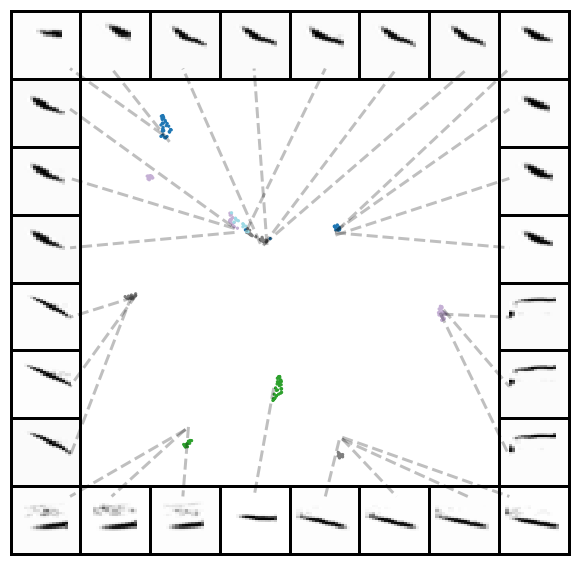

NYADIRAQSI30


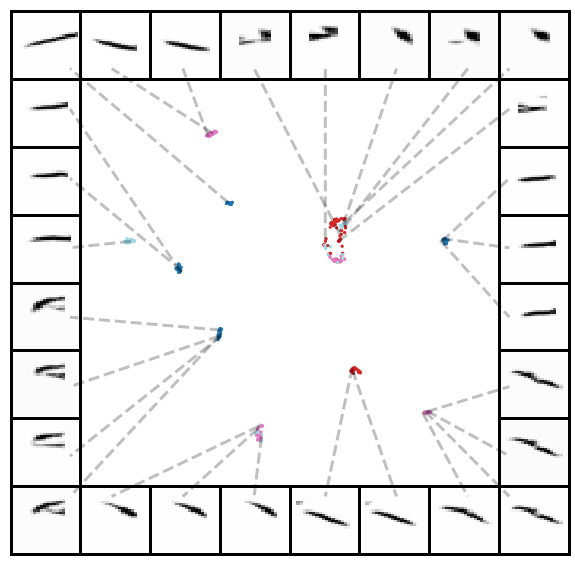

PAGeneva08-47


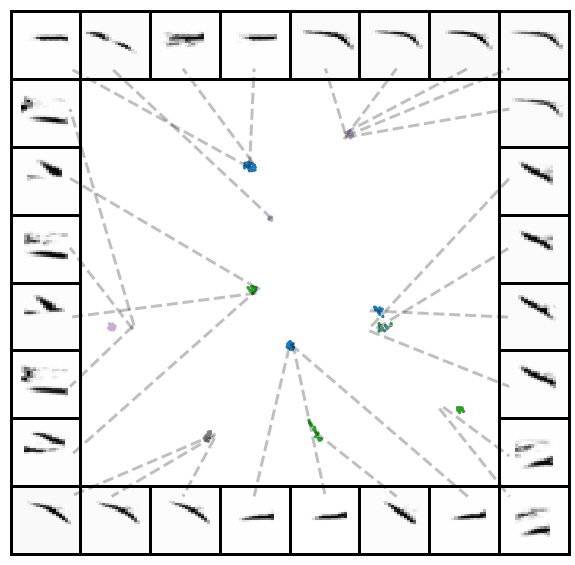

NYADIRAQSI26


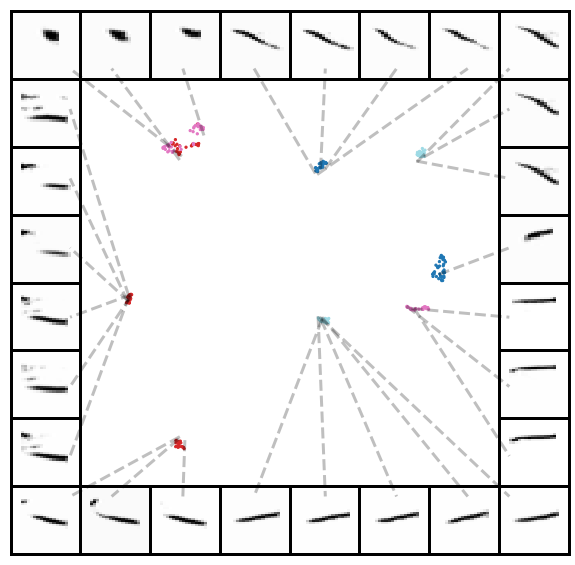

NYADIRAQBT36


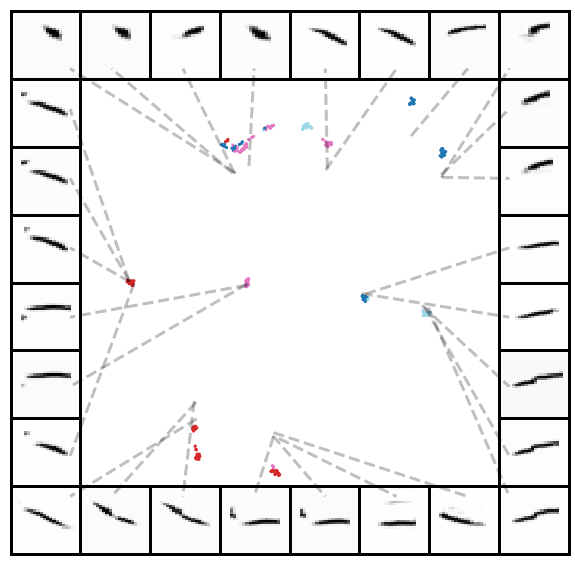

PAConneaut08-010


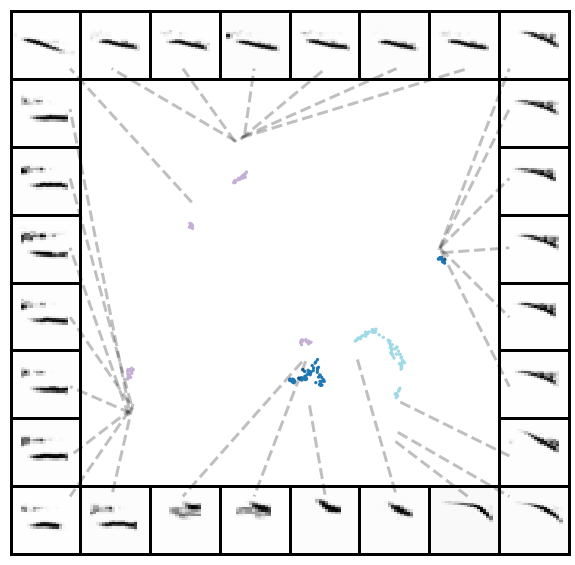

WIHOR43


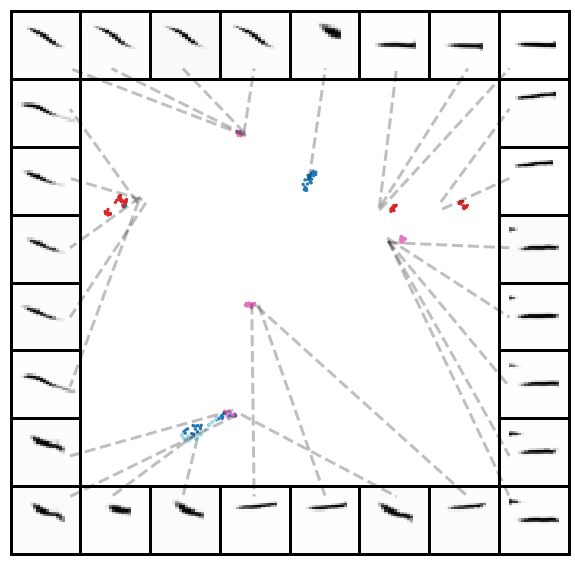

NYHVVLY38


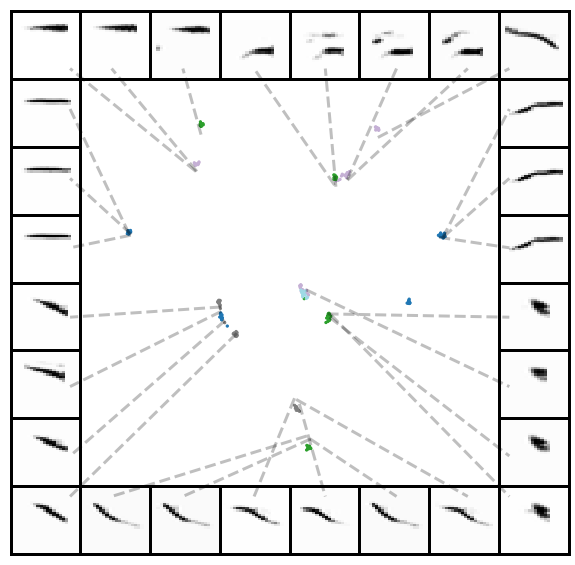

PAWatsonRun08-11


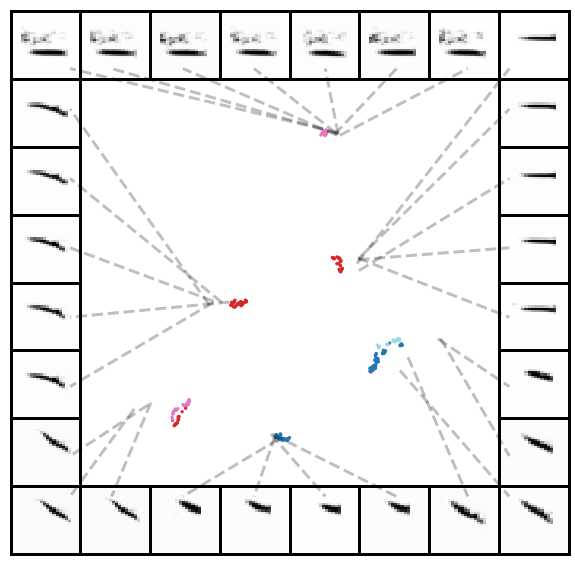

NYADIRAQBT01


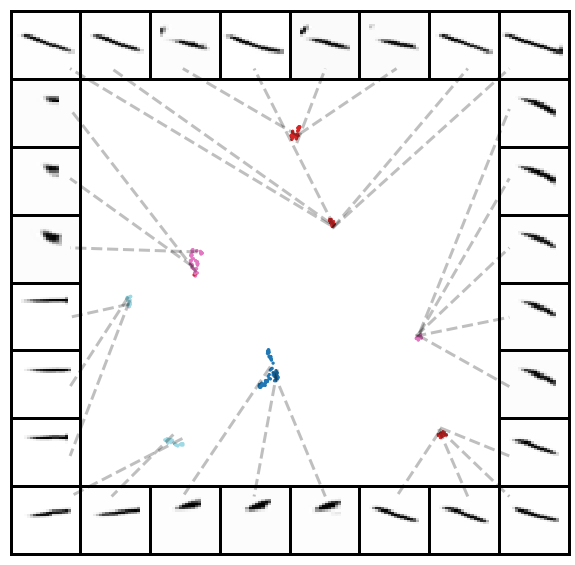

NYHVVLY14


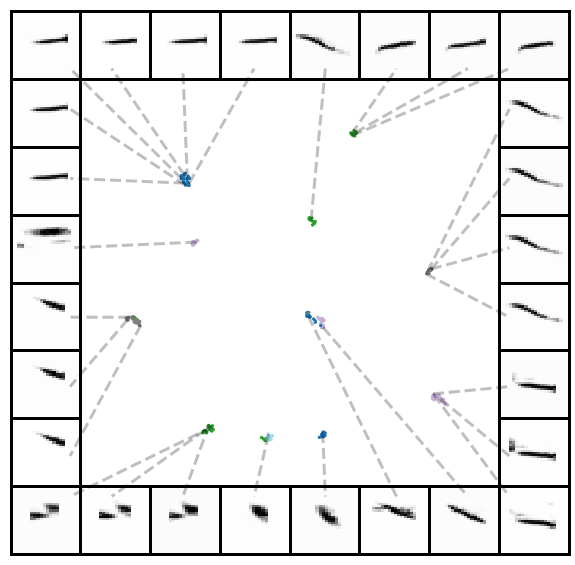

WIHOR62


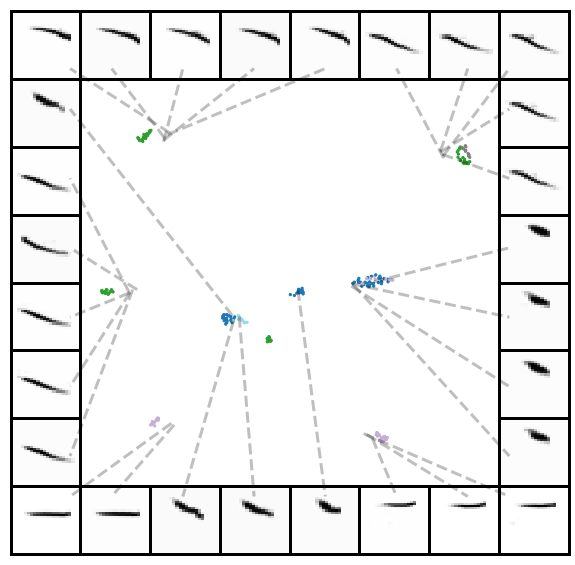

MIWAT14


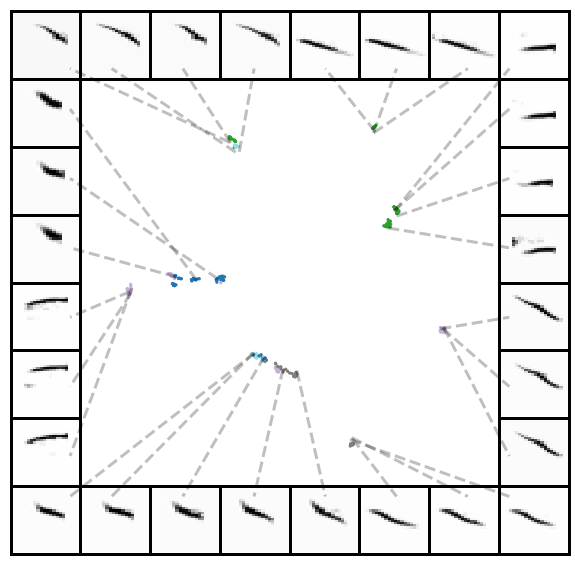

NYHVTHO10


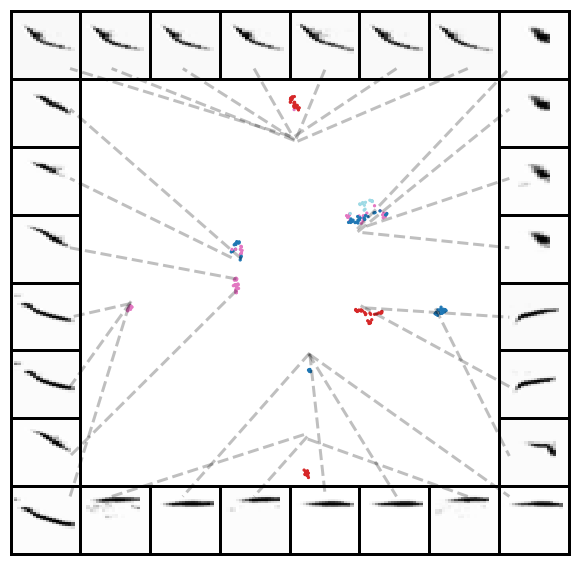

NYHVVLY37


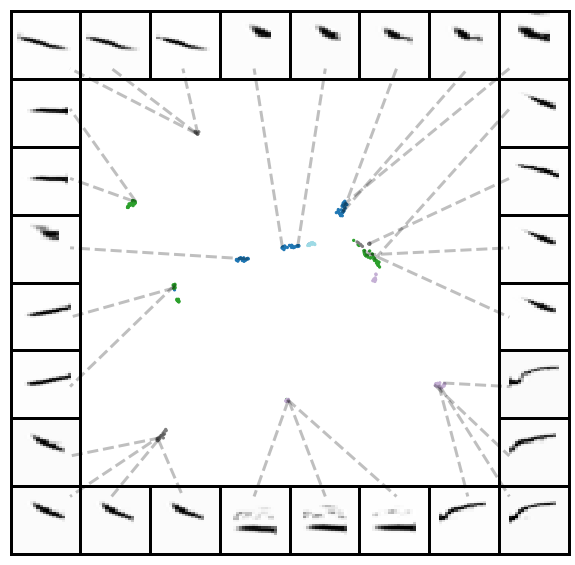

NYHVTIV27


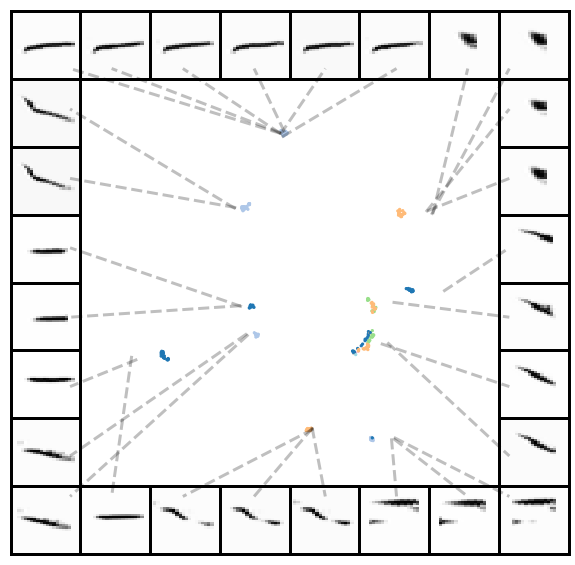

PAGeneva08-48


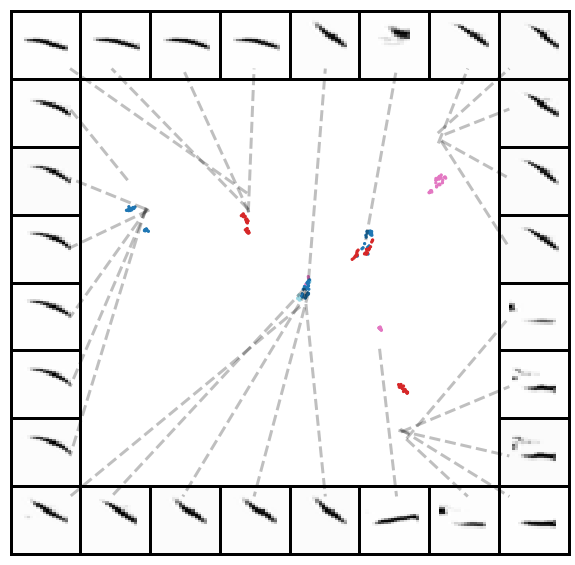

WIHOR81


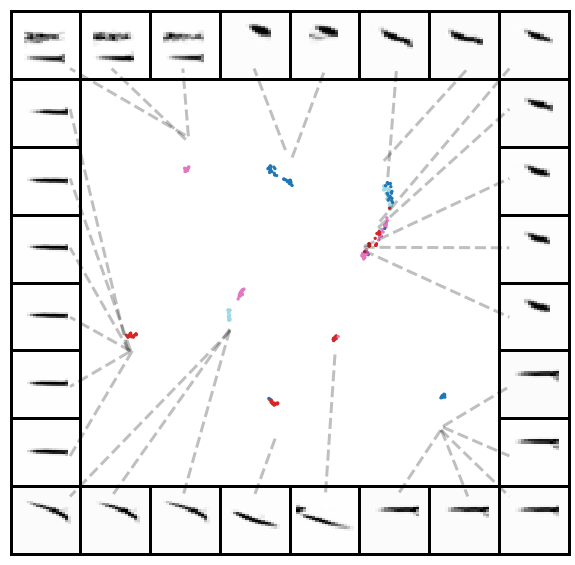

NYHVTHO28


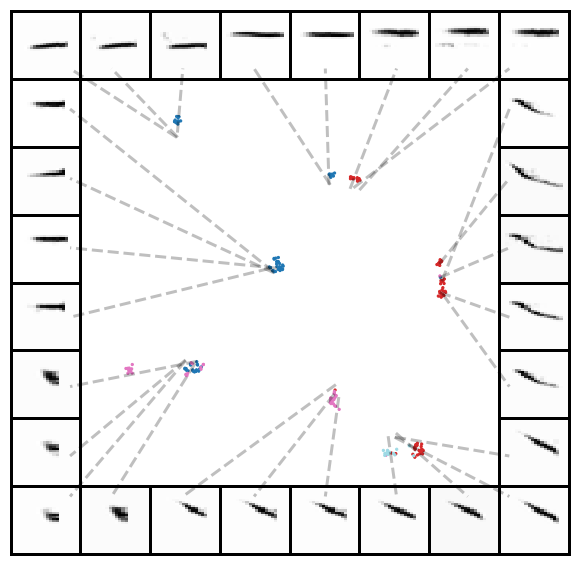

NYADIRAQSI24


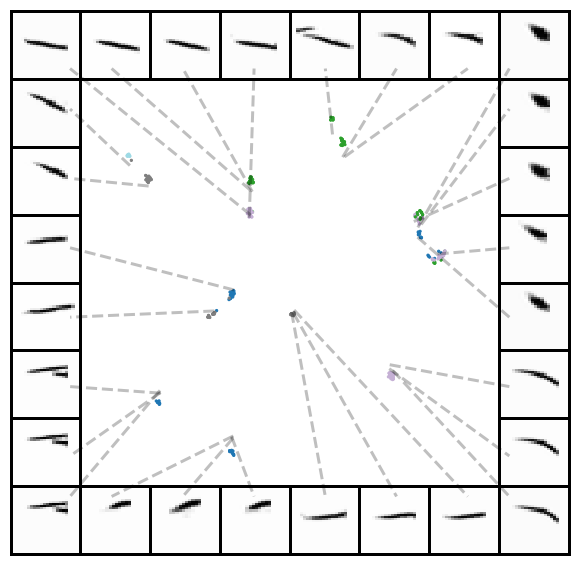

NYHVVLY21


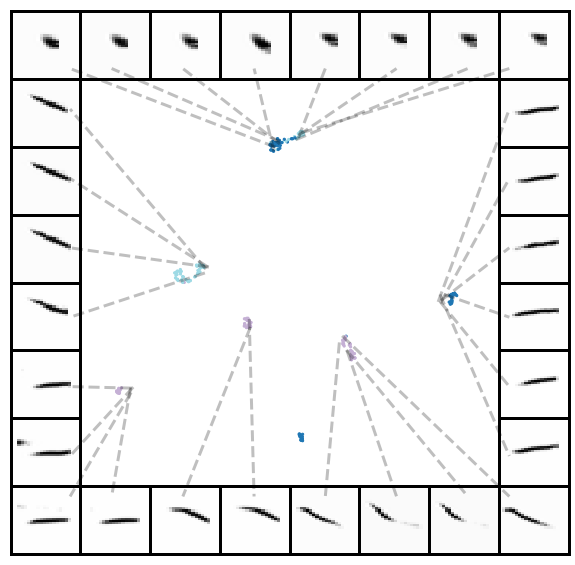

PAWatsonRun08-08


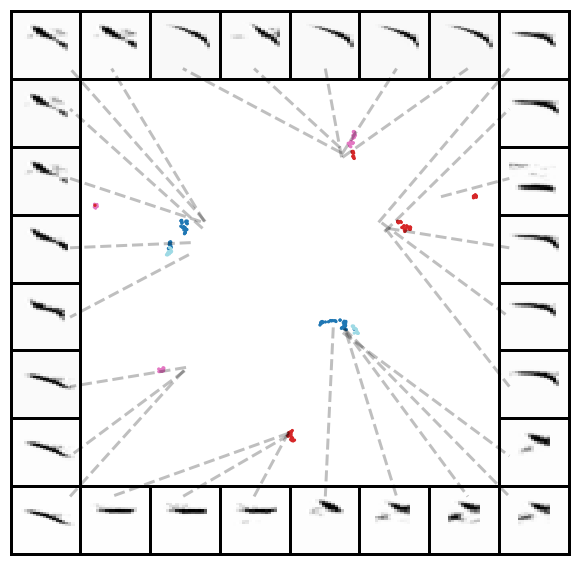

NYADIRAQSI13


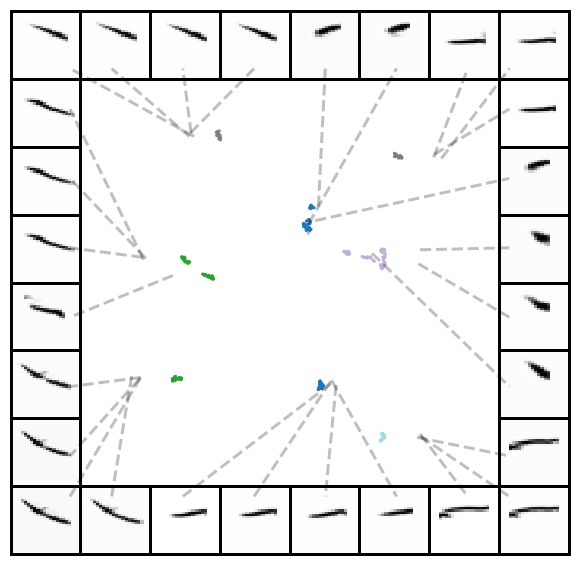

NYADIRAQSI08


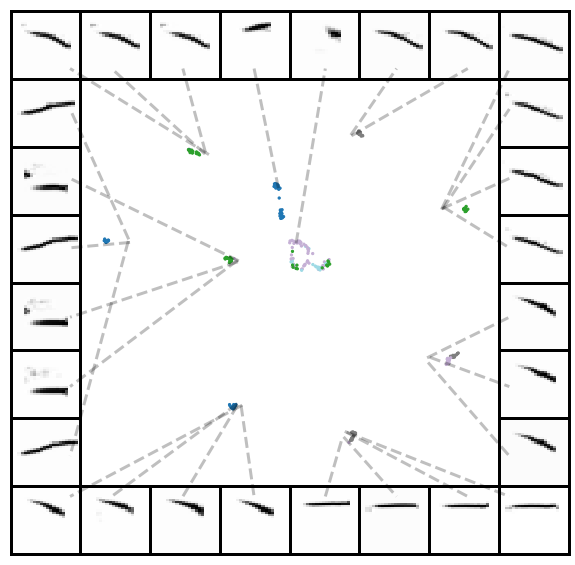

PAConneaut08-028


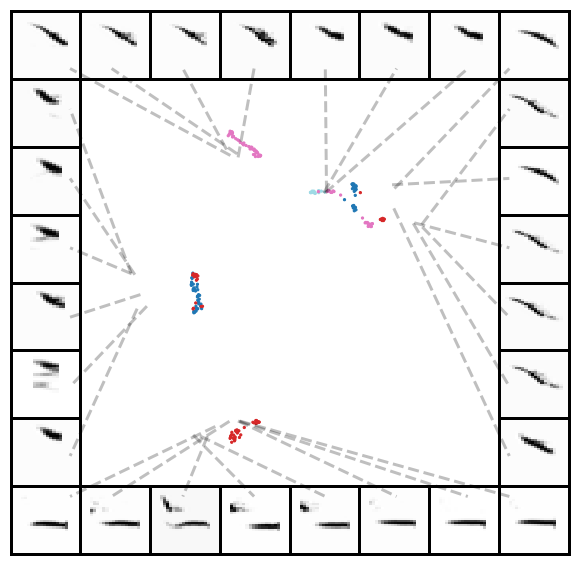

MIWAT56


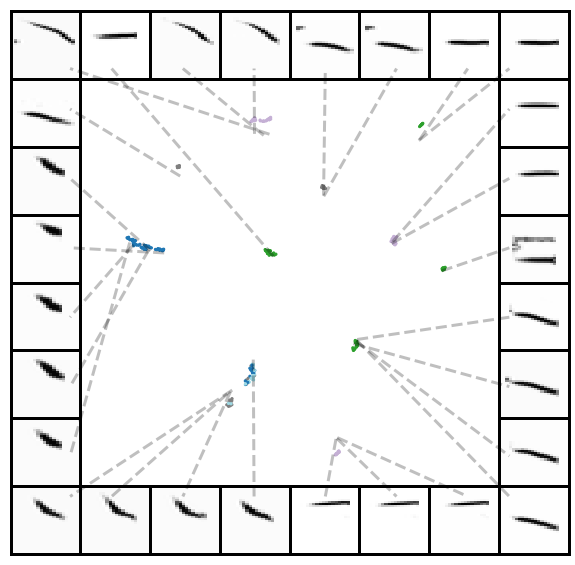

PAWatsonRun08-05


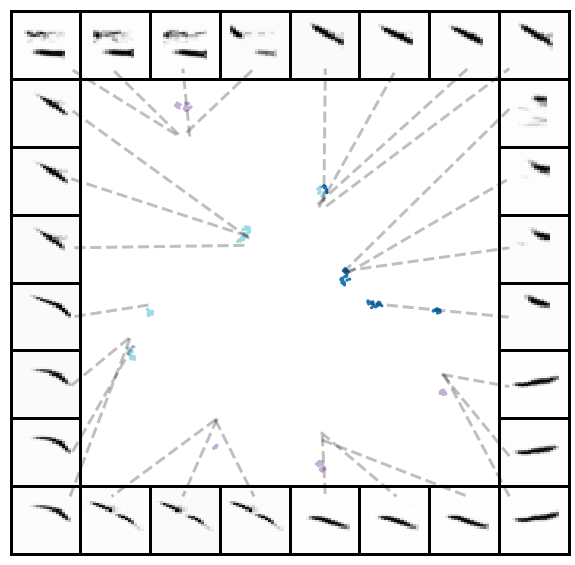

PAGeneva08-64


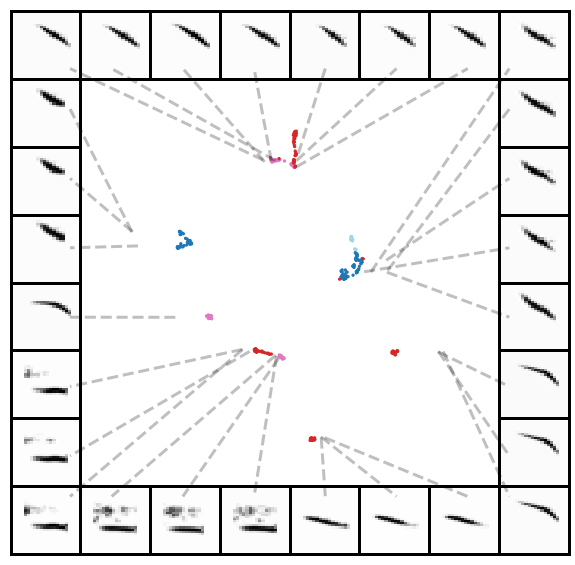

WIHOR20


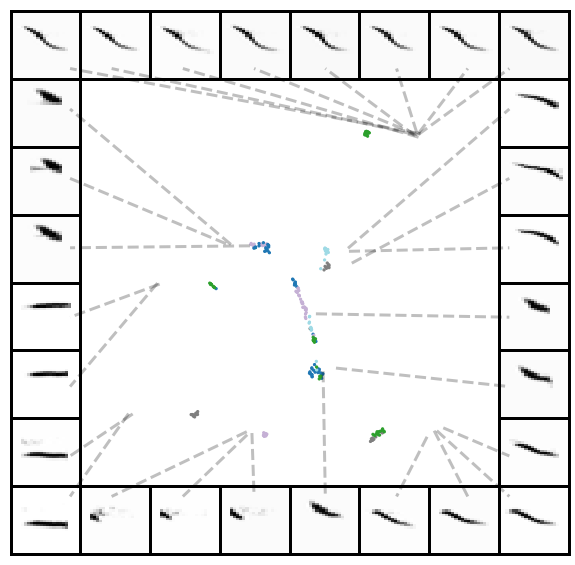

NYMONT26


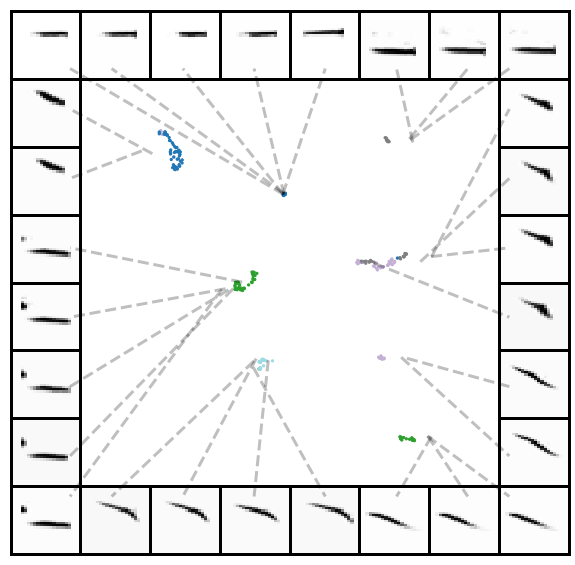

NYADIRAQBT15


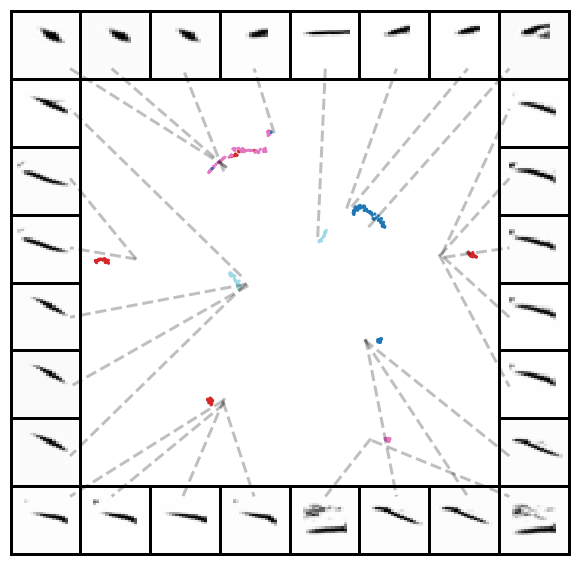

NYHVTHO09


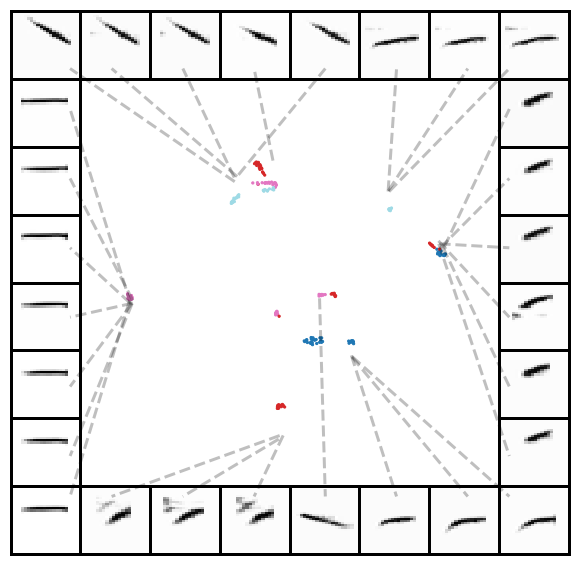

WIHOR47


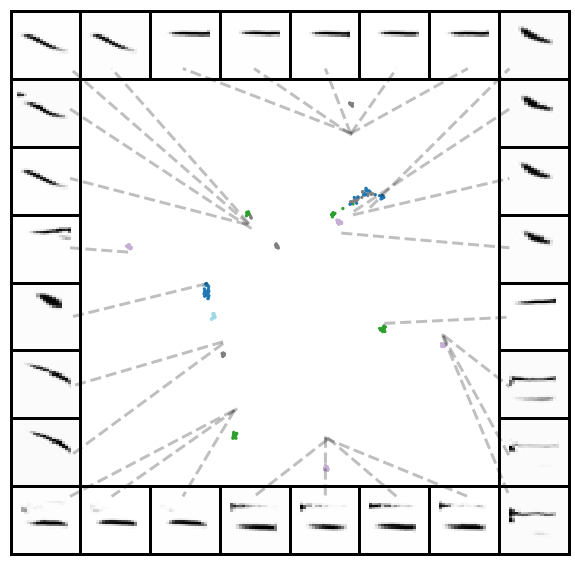

NYADIRAQSI22


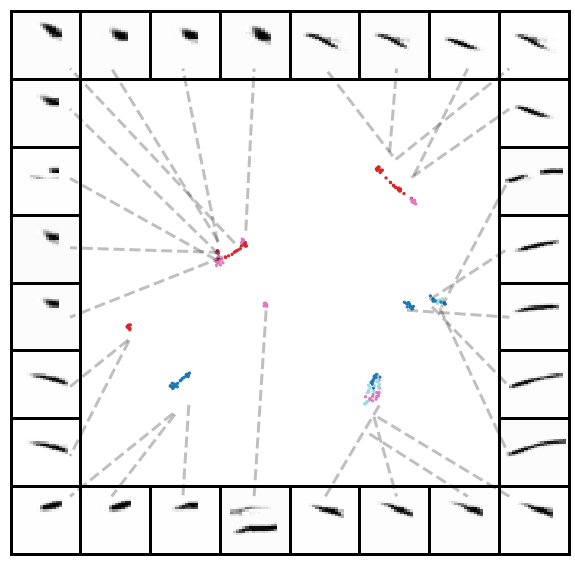

WIHOR07


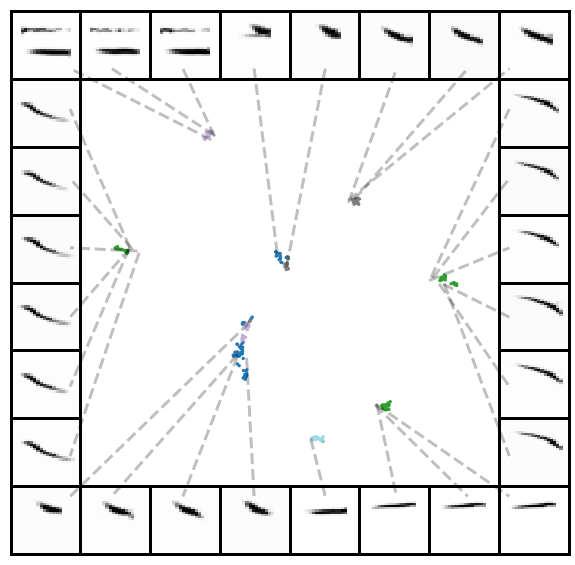

NYADIRAQBT24


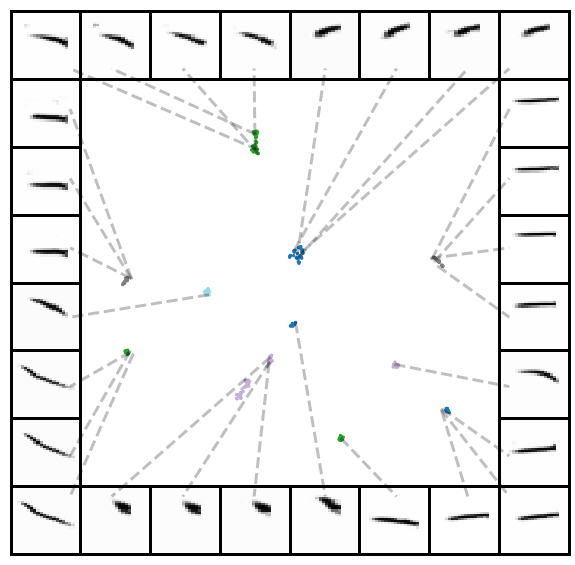

WIHOR91


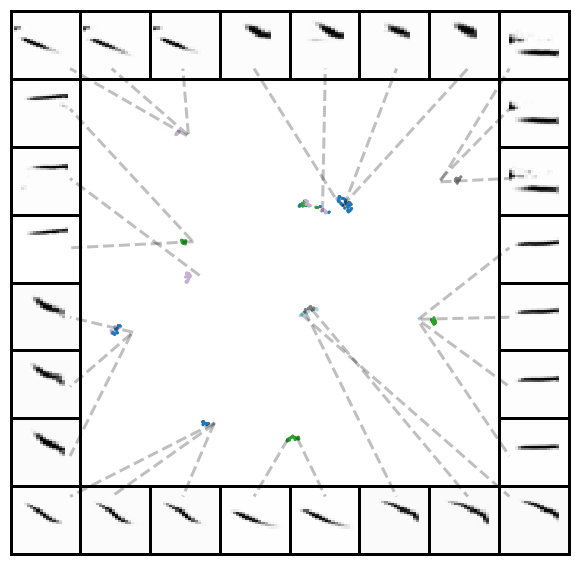

PAConneaut08-082


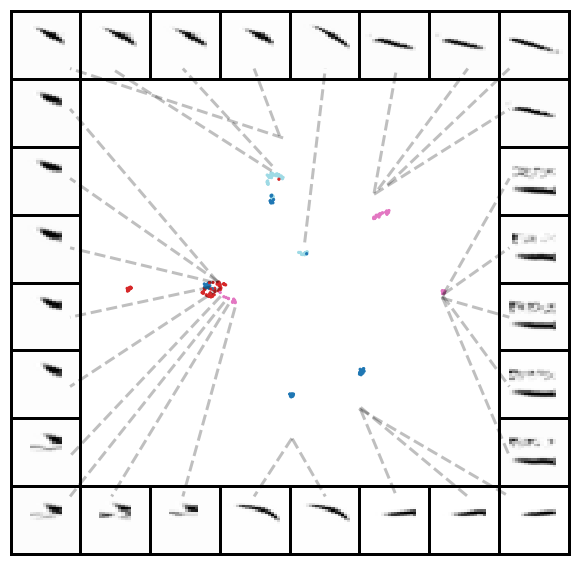

MIWAT67


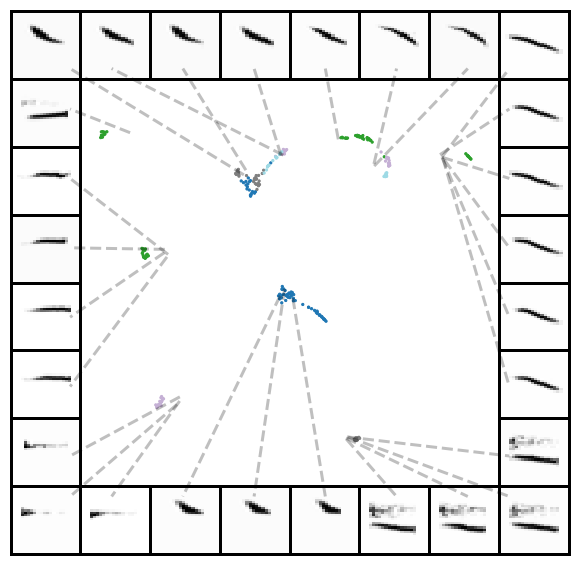

MIWAT50


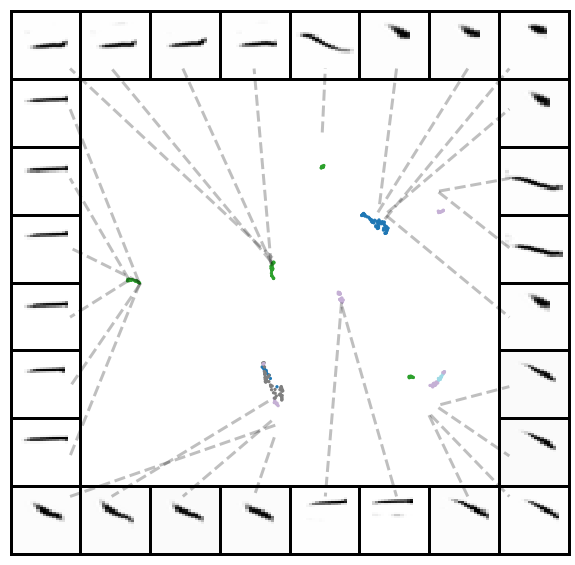

NYADIRAQBT08


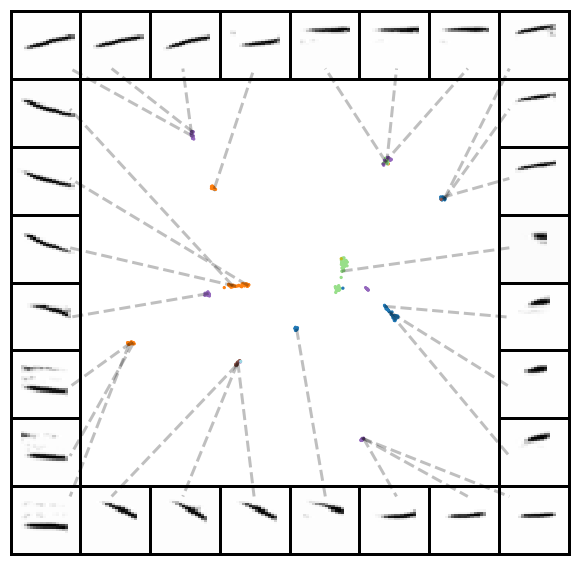

PAWatsonRun08-03


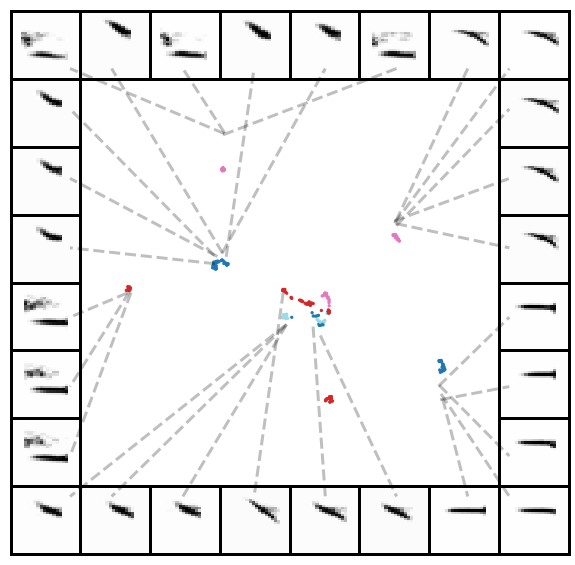

PAConneaut08-110


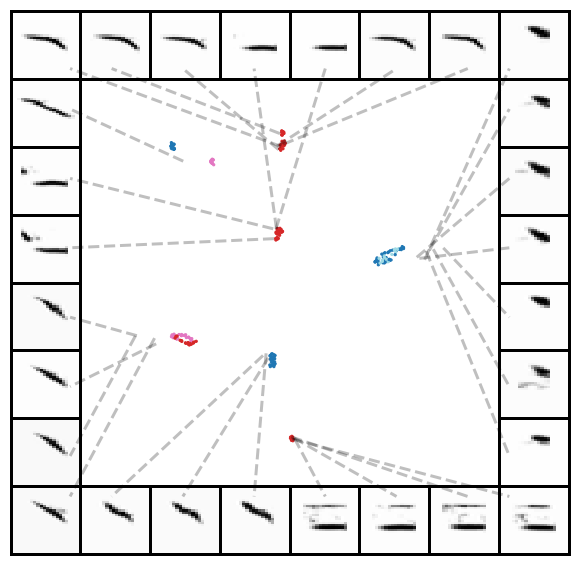

MIWAT06


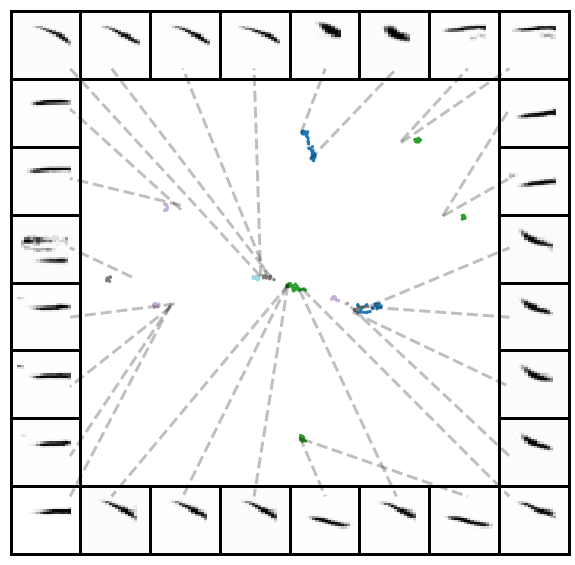

WIHOR05


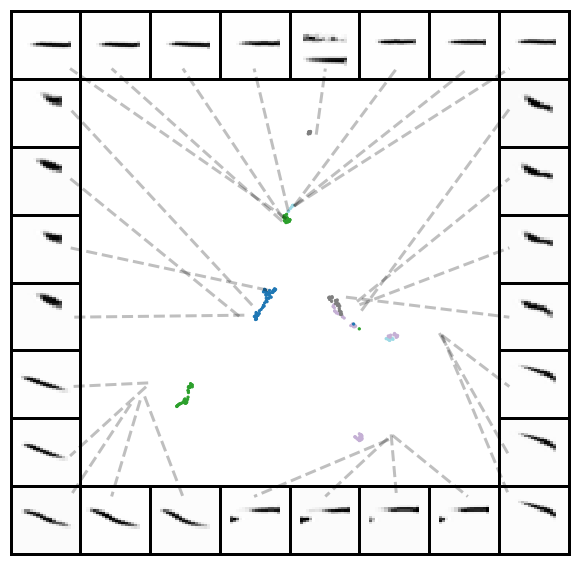

MIWAT28


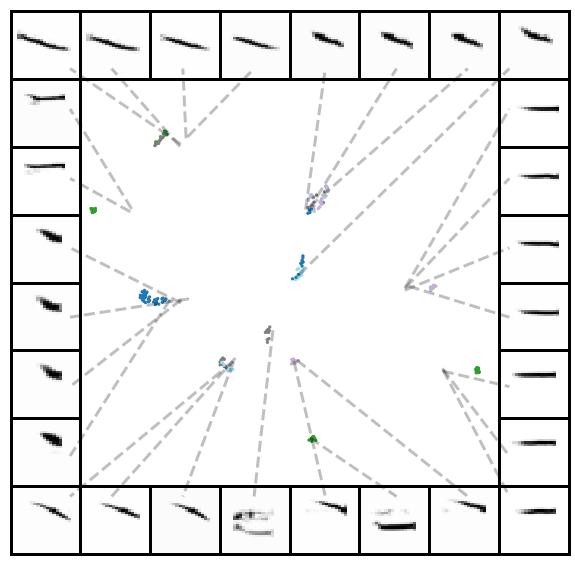

NYADIRAQSI20


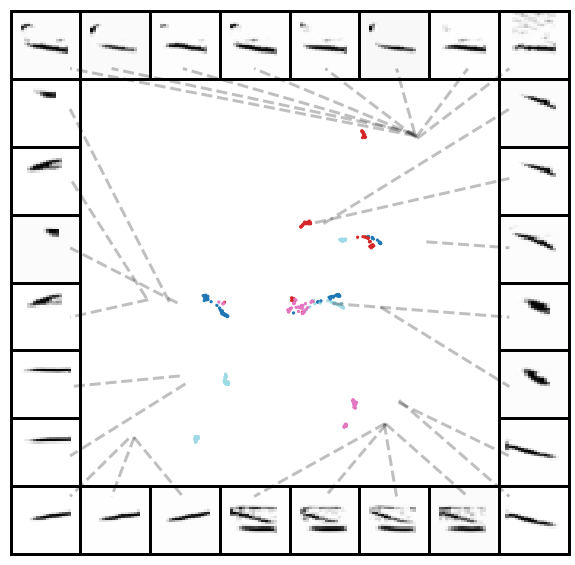

WIHOR85


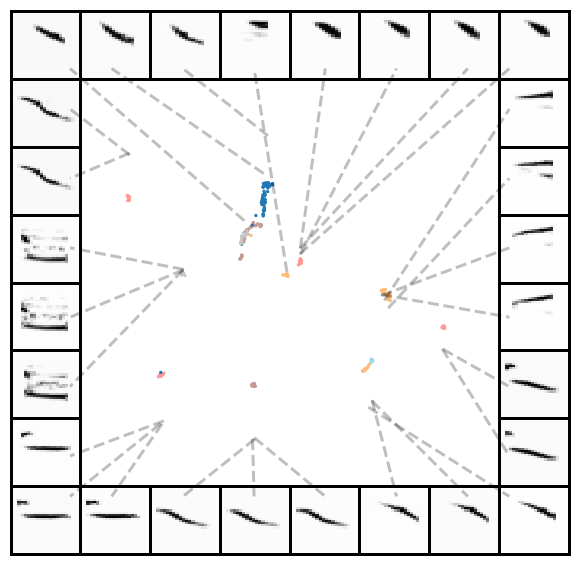

NYMONT18


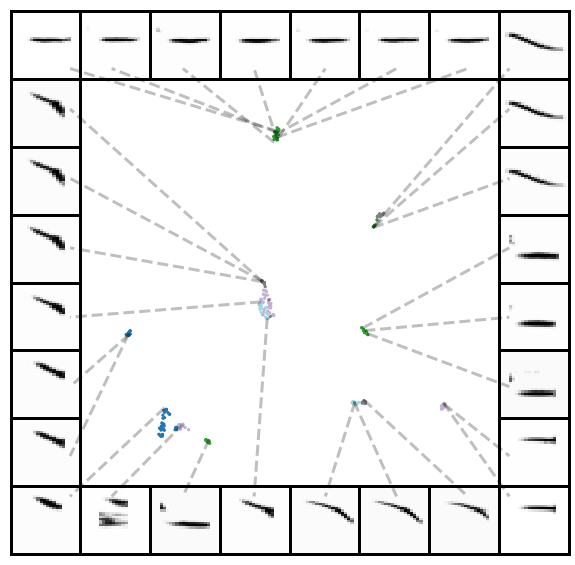

MIWAT25


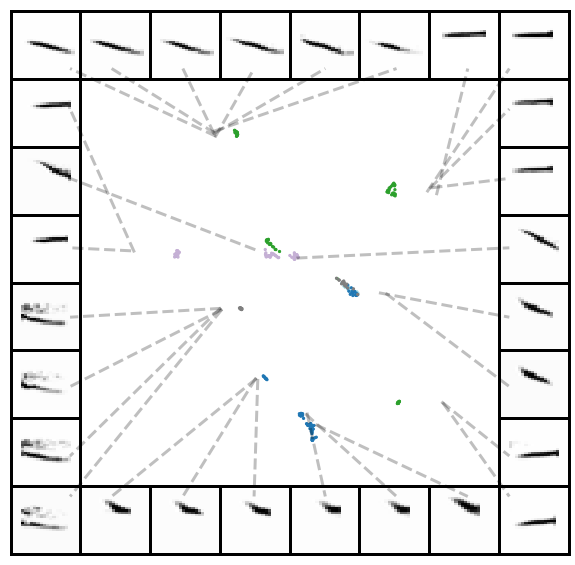

NYHVTIV23


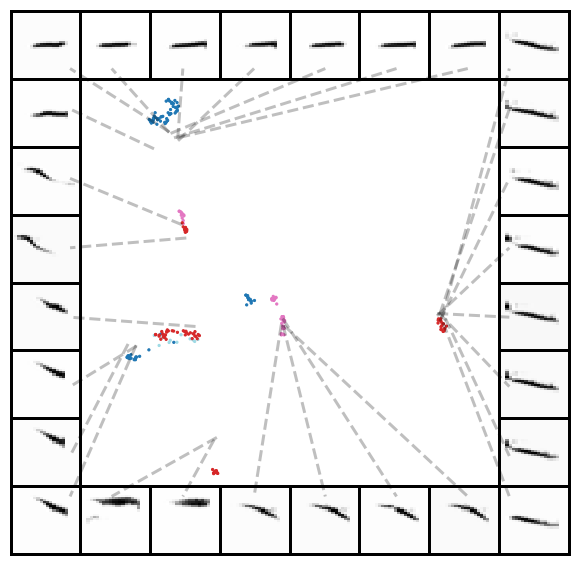

NYADIRAQSI01


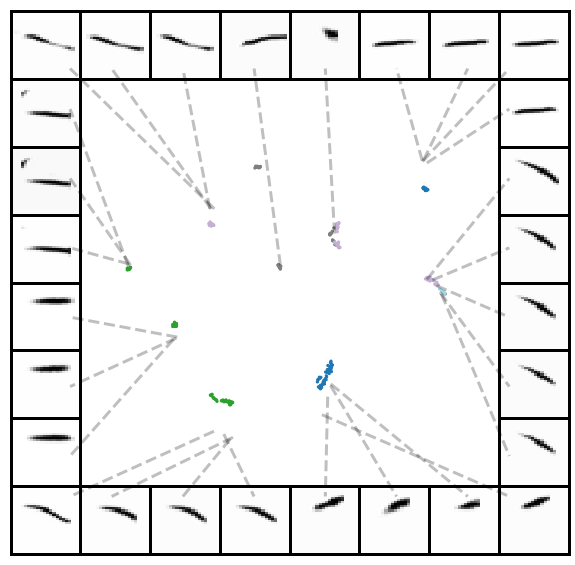

WIHOR64


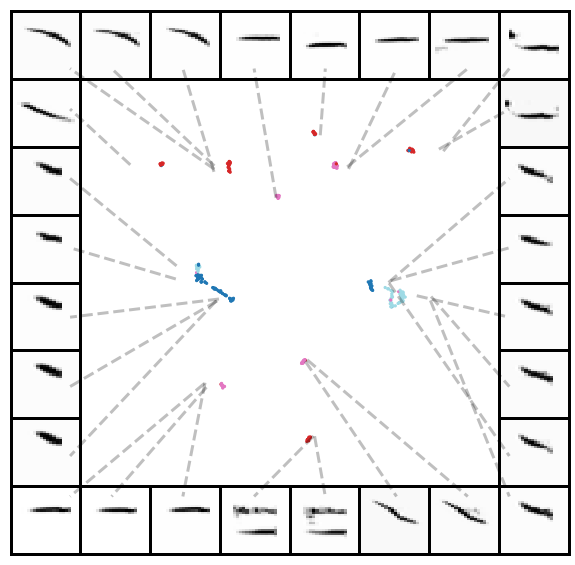

MIWAT49


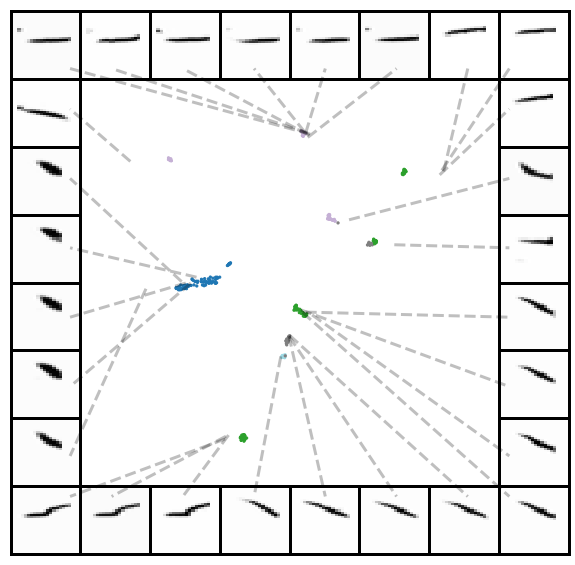

NYMONT62


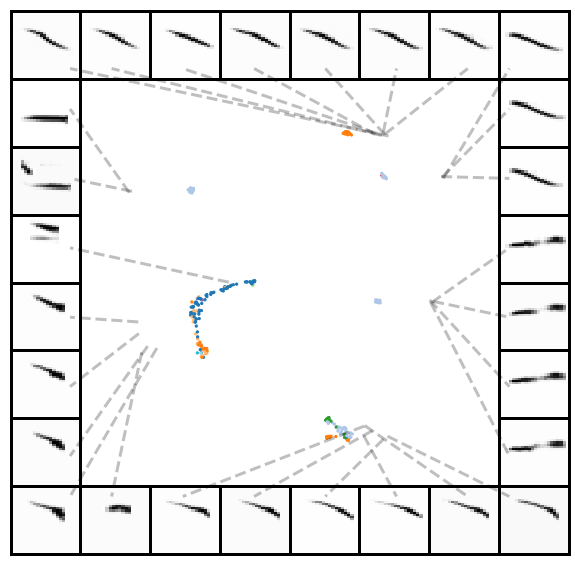

MIWAT12


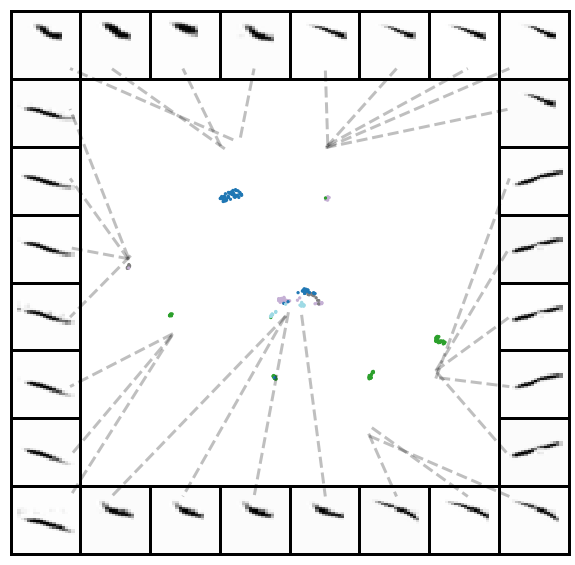

MIWAT52


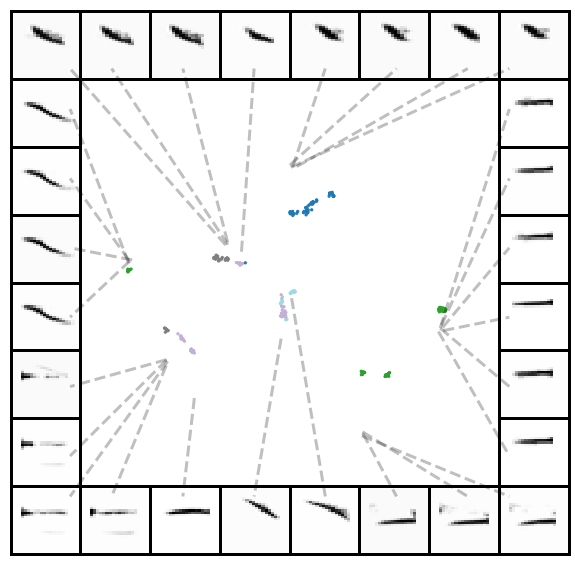

PAWatsonRun08-17


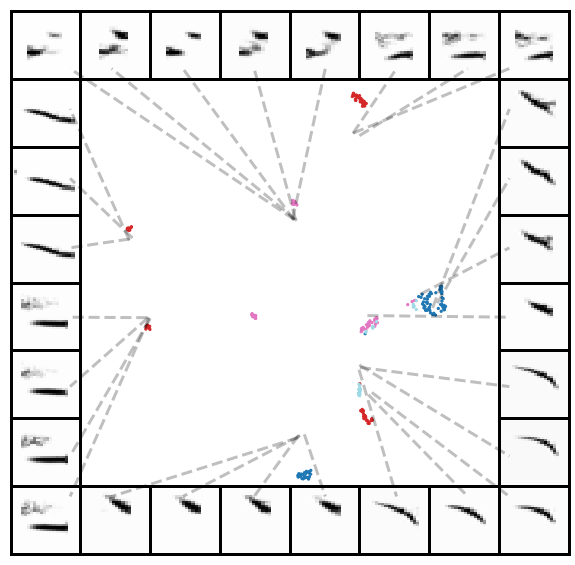

NYADIRAQSI17


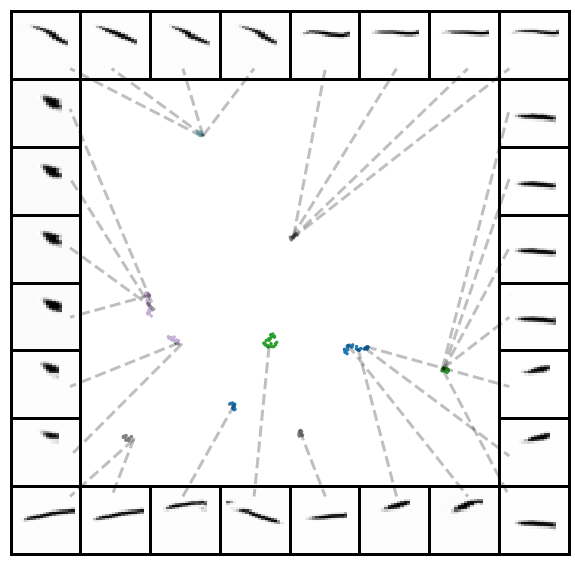

NYADIRAQBT07


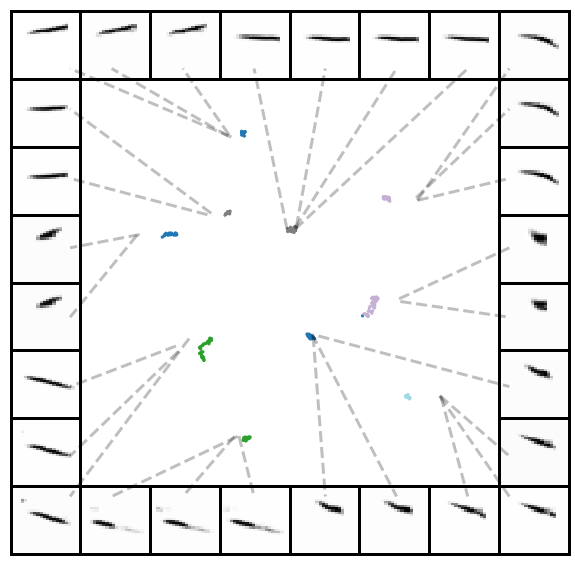

PAConneaut08-021


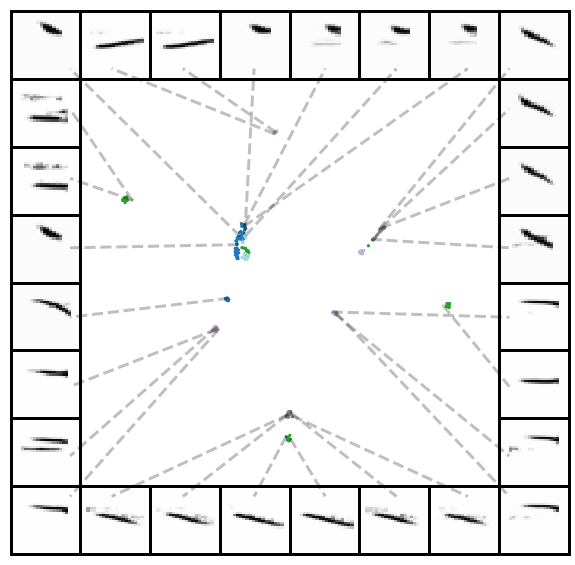

PAGeneva08-35


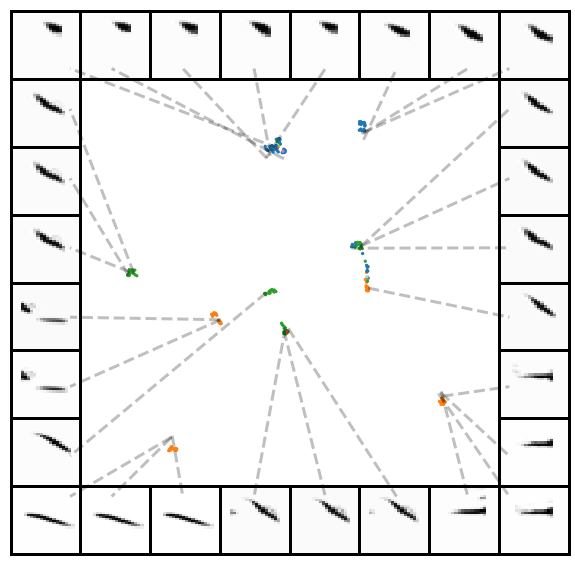

PAConneaut08-079


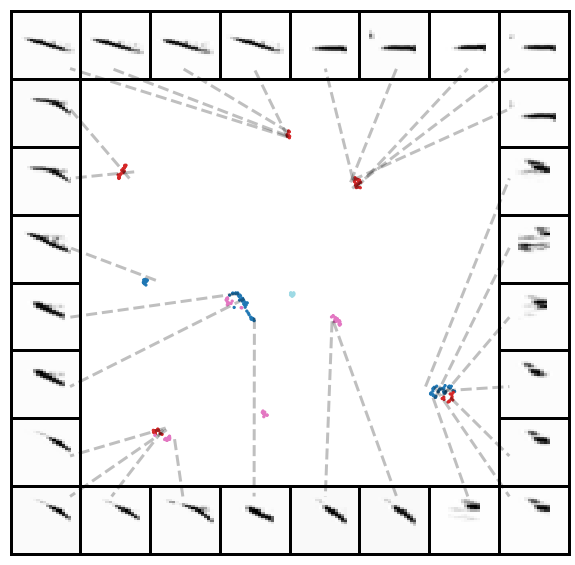

MIWAT47


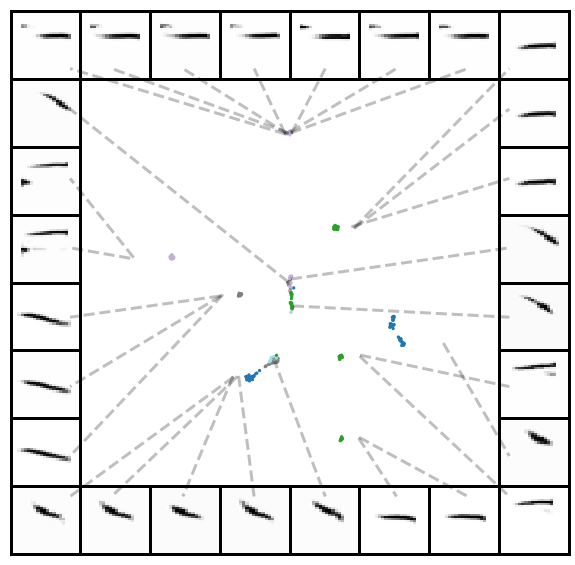

NYADIRAQBT09


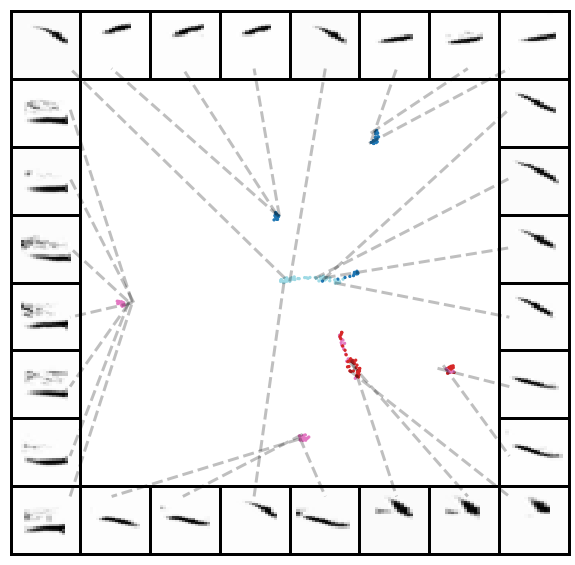

PAGeneva08-23


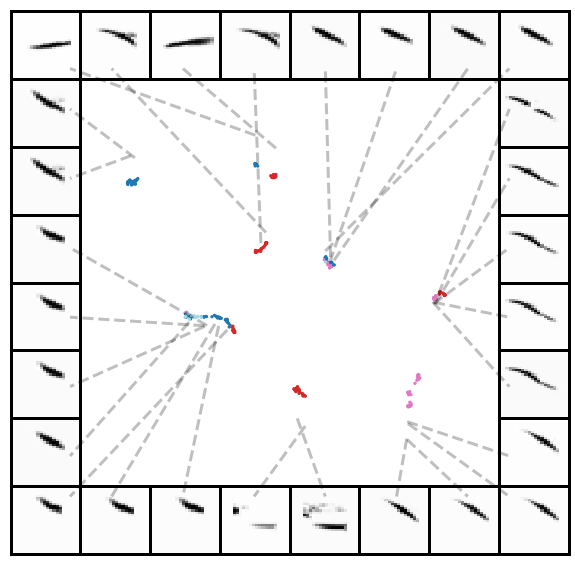

PAWatsonRun08-19


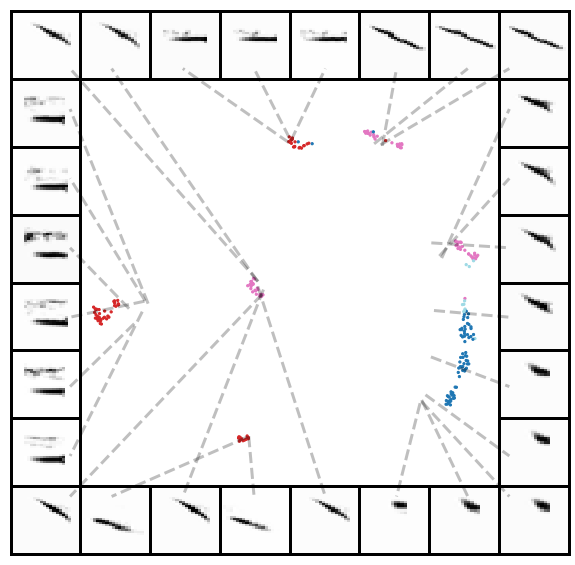

NYHVVLY07


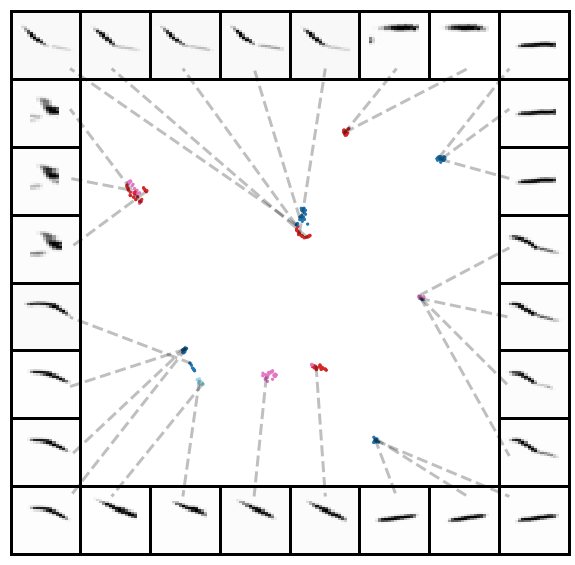

NYADIRAQBT25


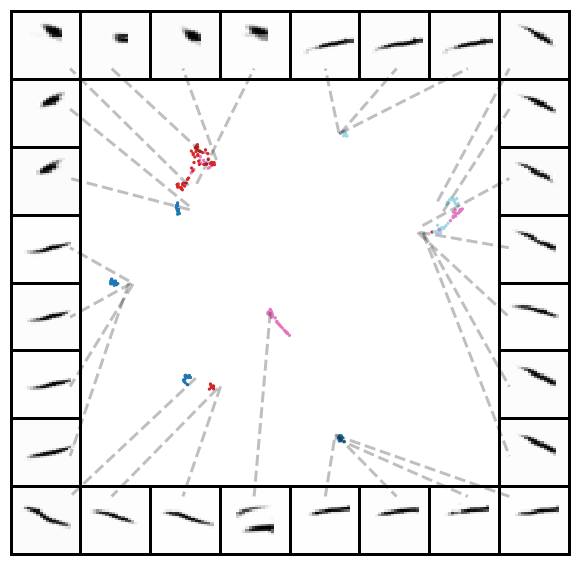

PAWatsonRun08-35


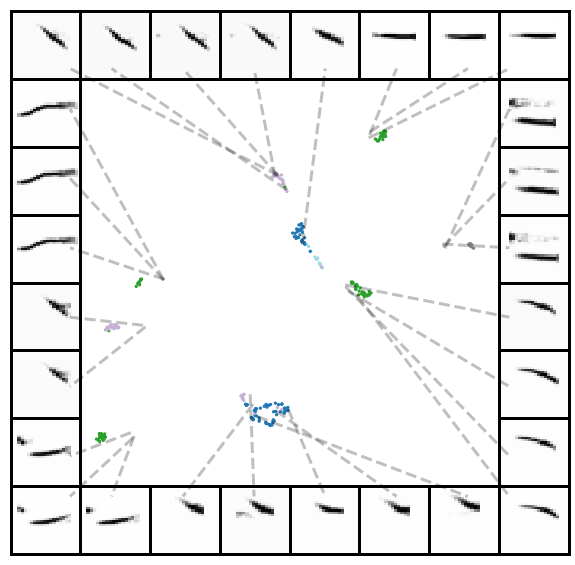

PAGeneva08-59


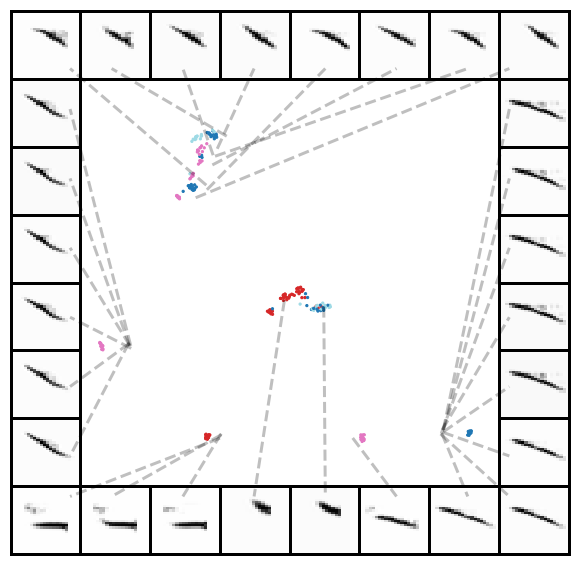

WIHOR86


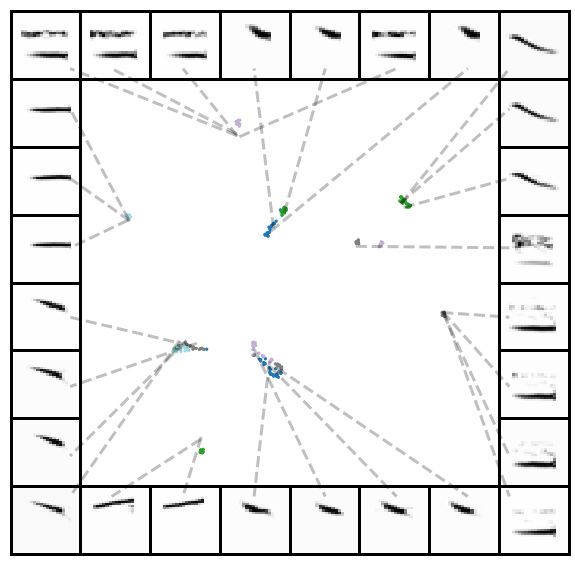

NYHVVLY26


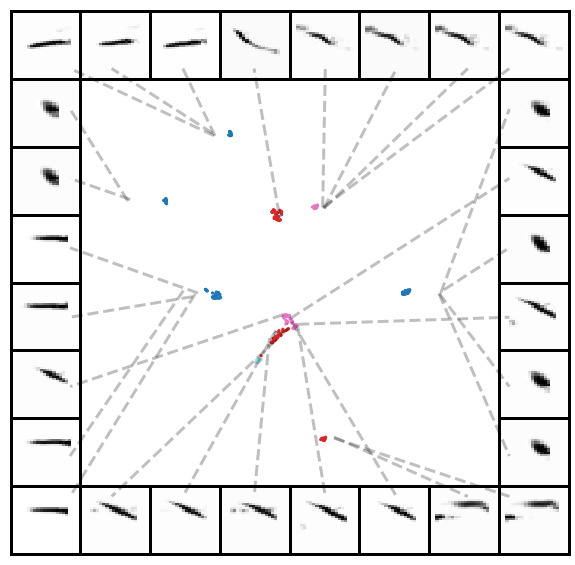

WIHOR46


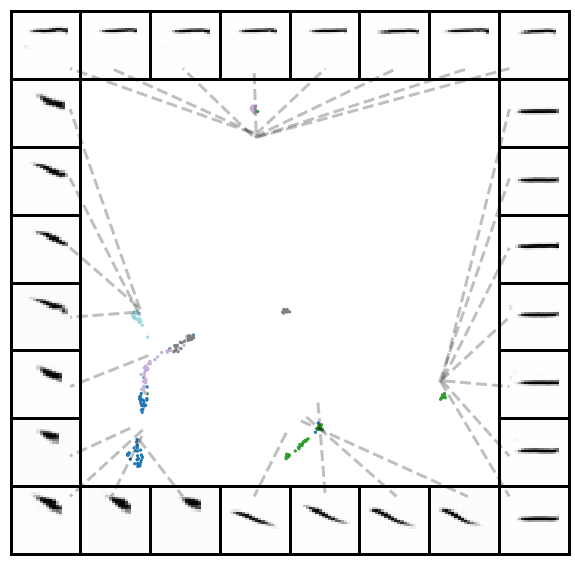

NYADIRAQSI23


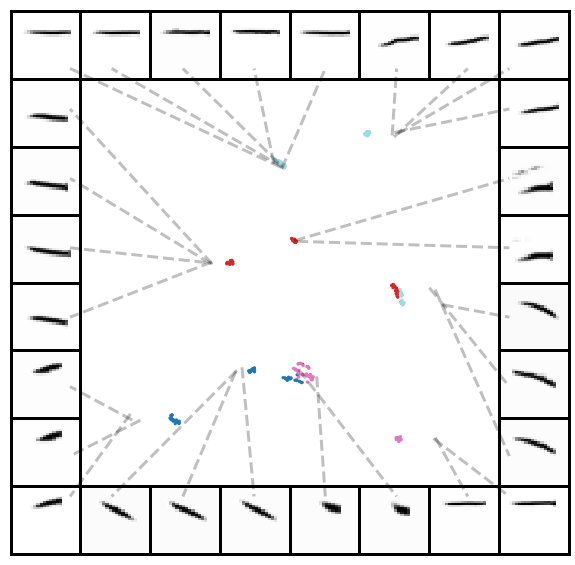

NYHVVLY08


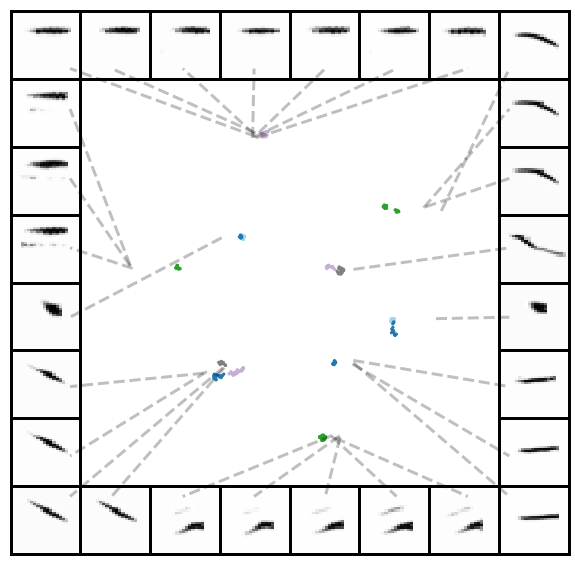

PAWatsonRun08-16


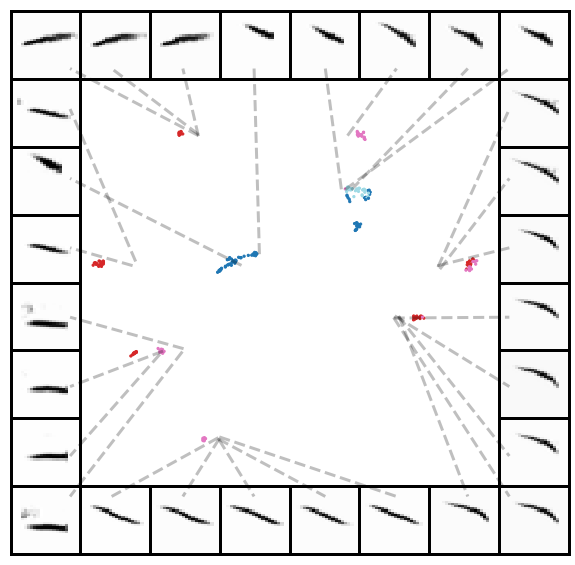

PAConneaut08-060


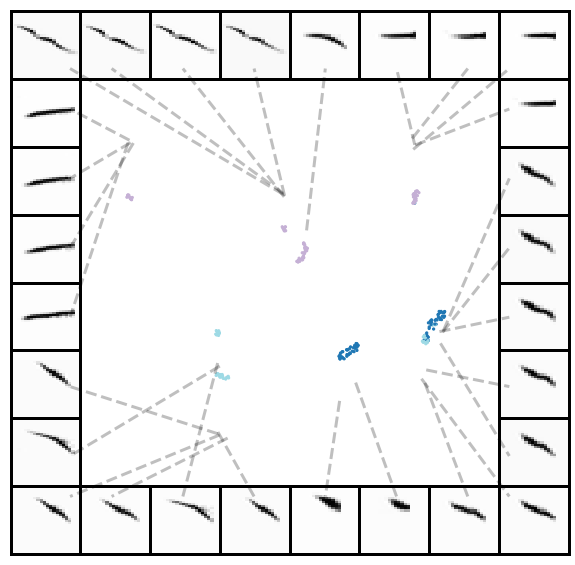

NYADIRAQBT06


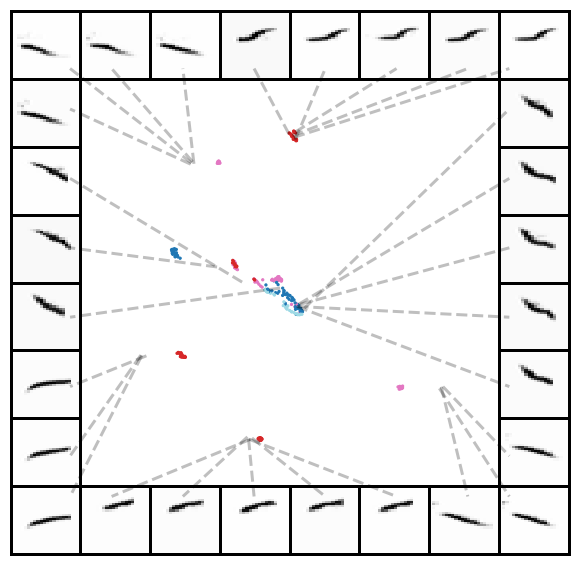

NYHVVLY05


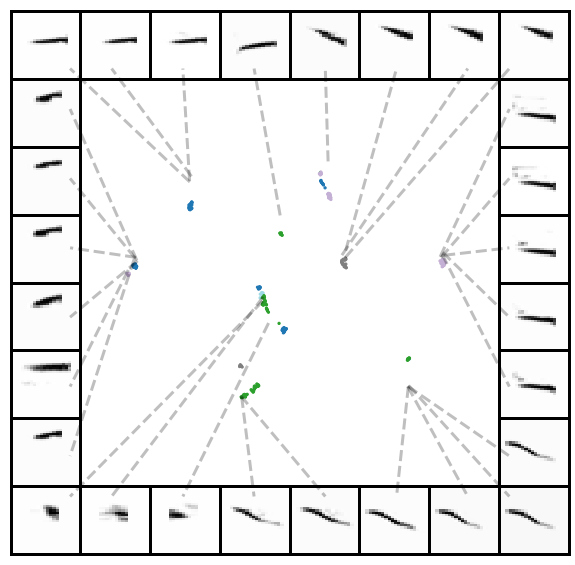

MIWAT53


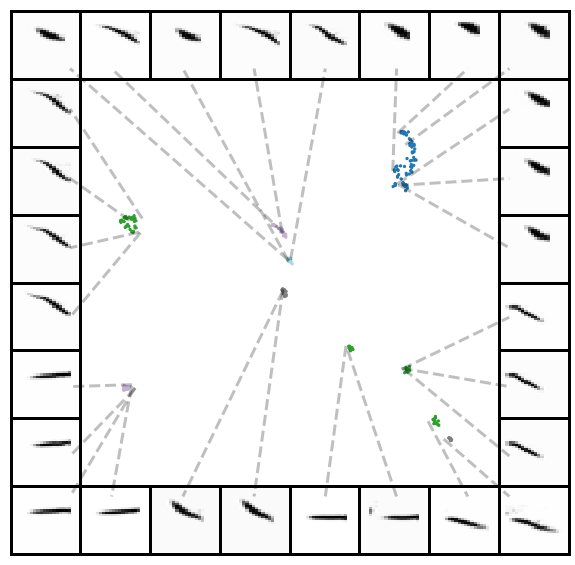

MIWAT13


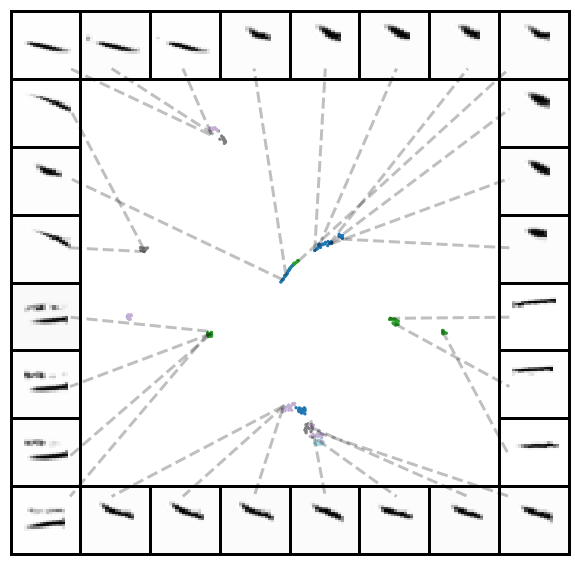

WIHOR89


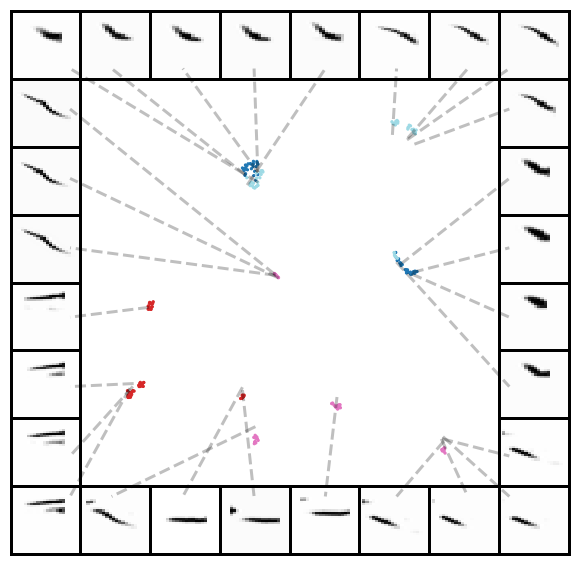

PAWatsonRun08-46


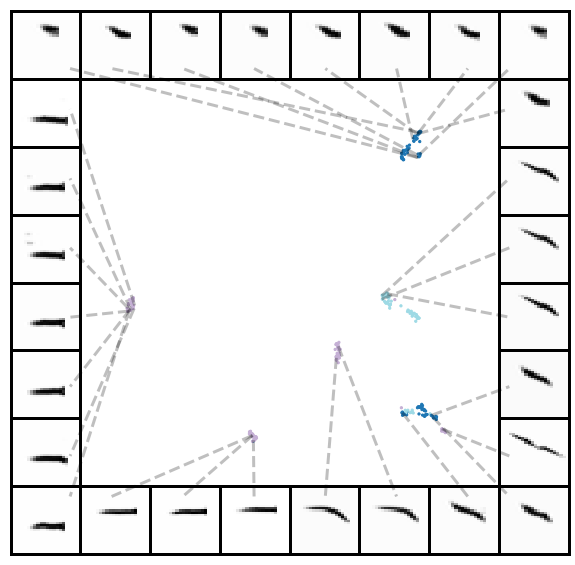

WIHOR35


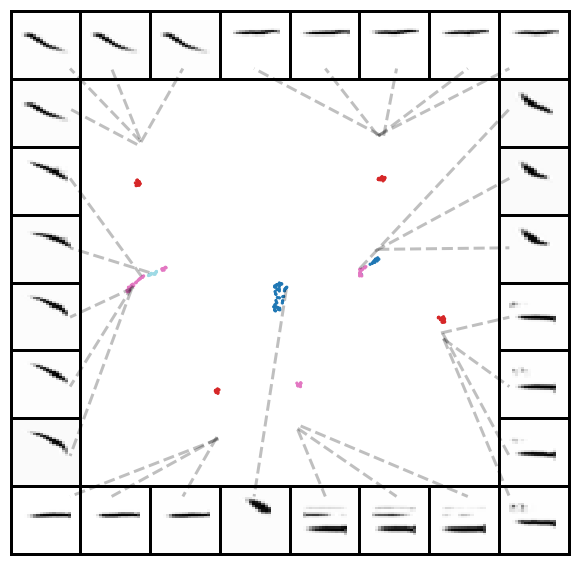

PAWatsonRun08-31


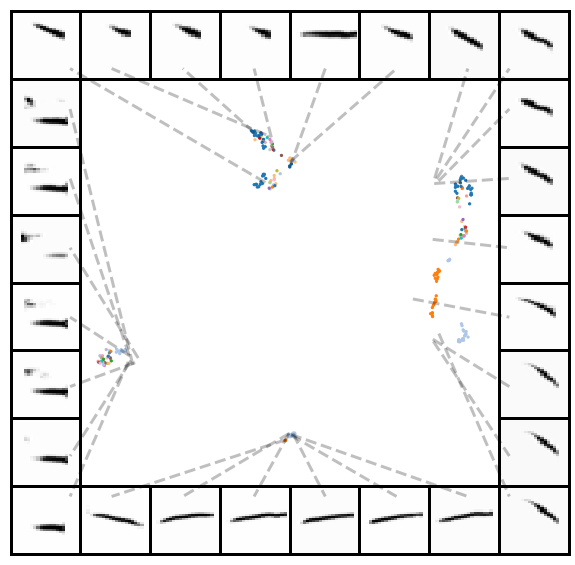

MIWAT22


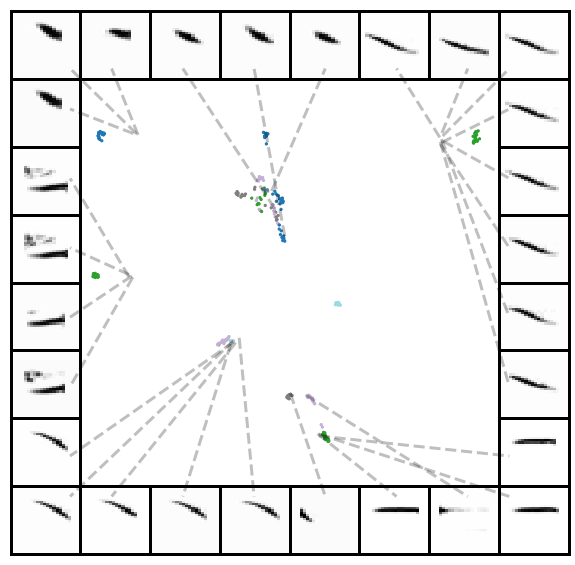

PAGeneva08-10


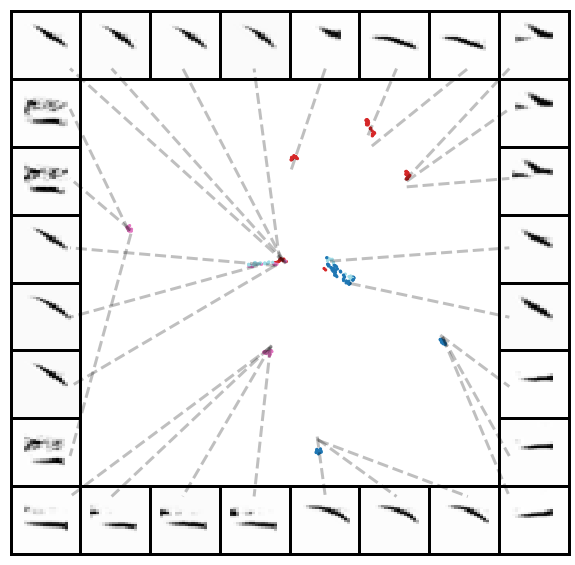

NYMONT12


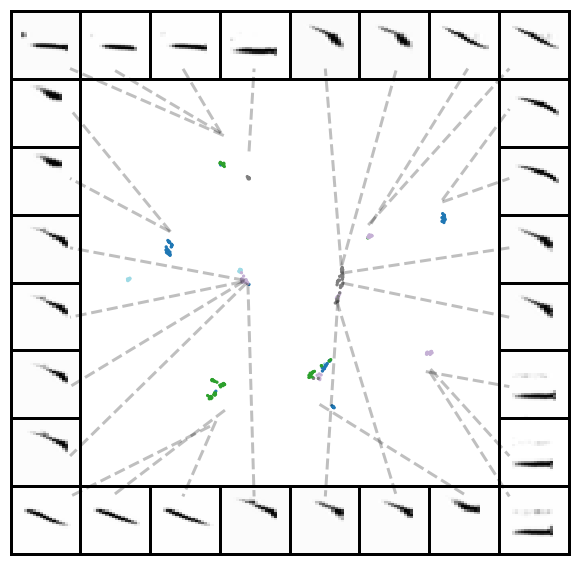

PAGeneva08-25


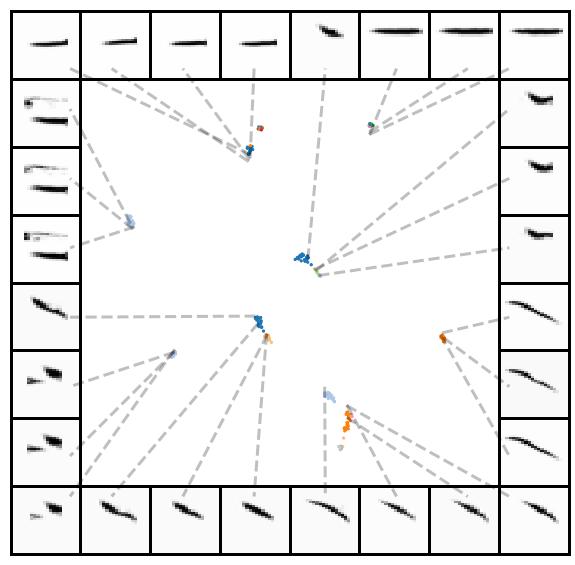

NYADIRAQSI04


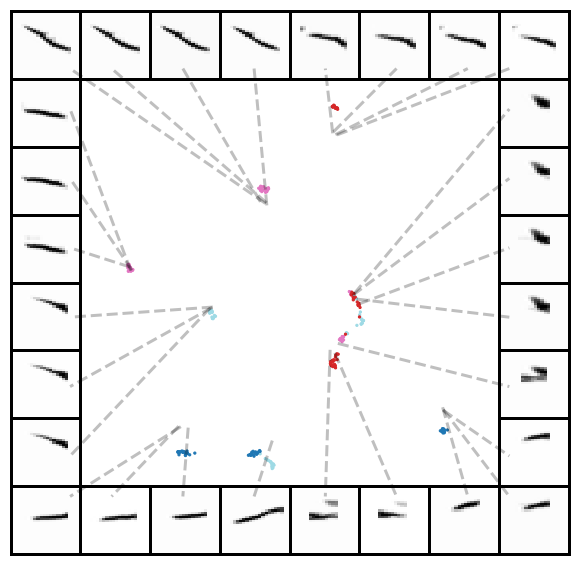

NYADIRAQBT02


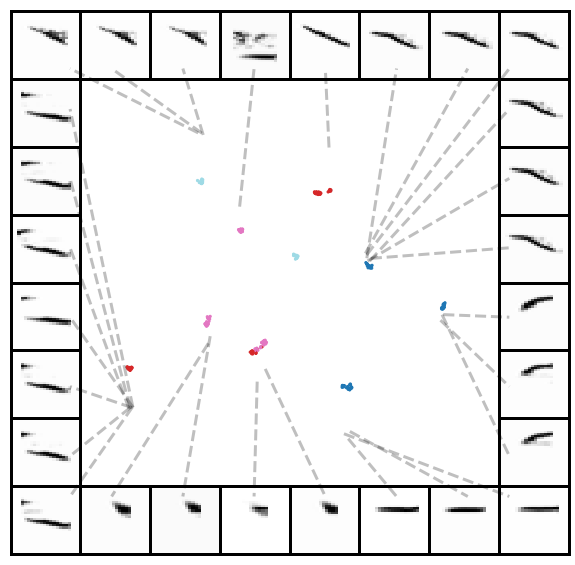

WIHOR37


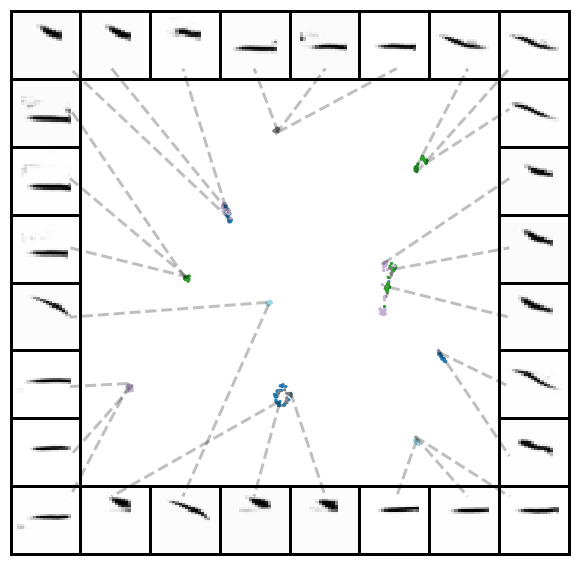

NYADIRAQSI09


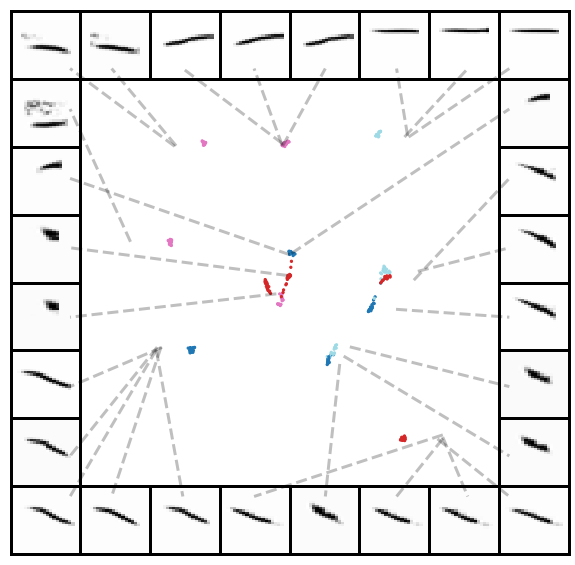

NYADIRAQBT19


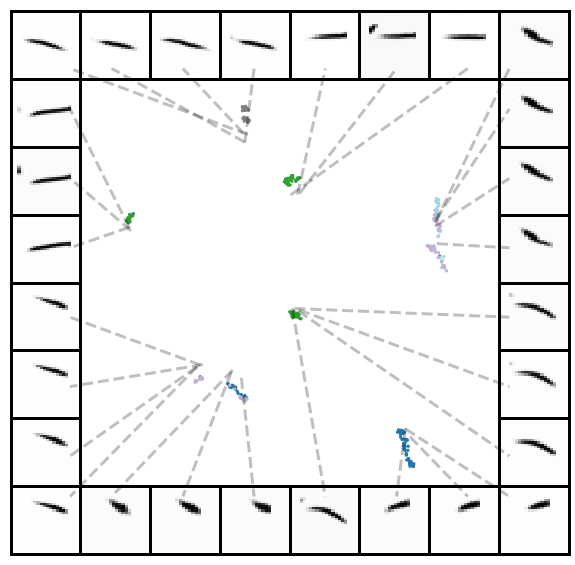

MIWAT36


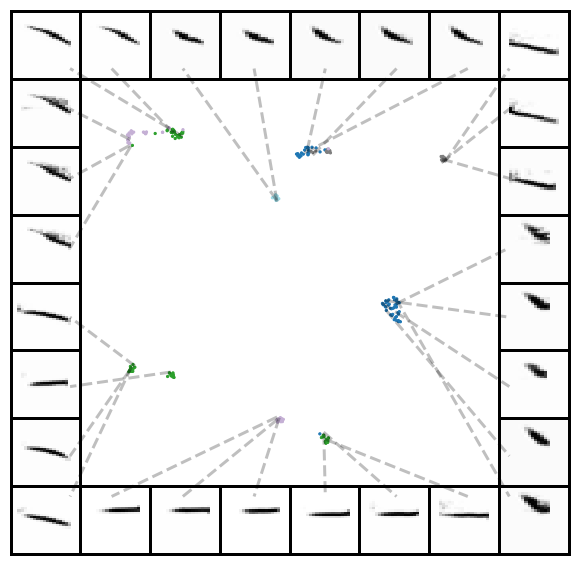

NYHVVLY20


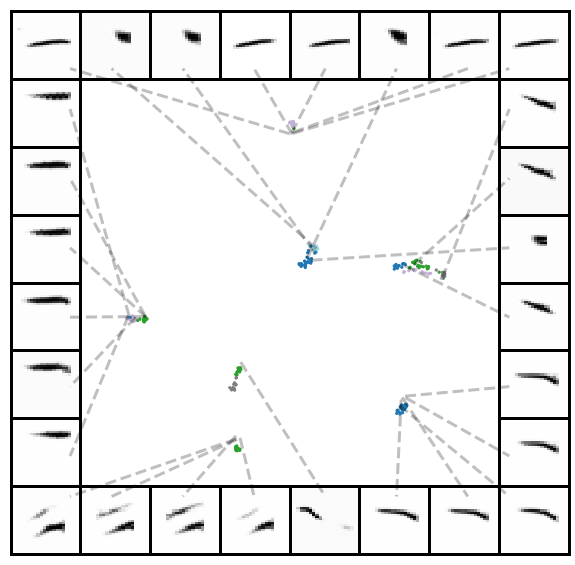

WIHOR40


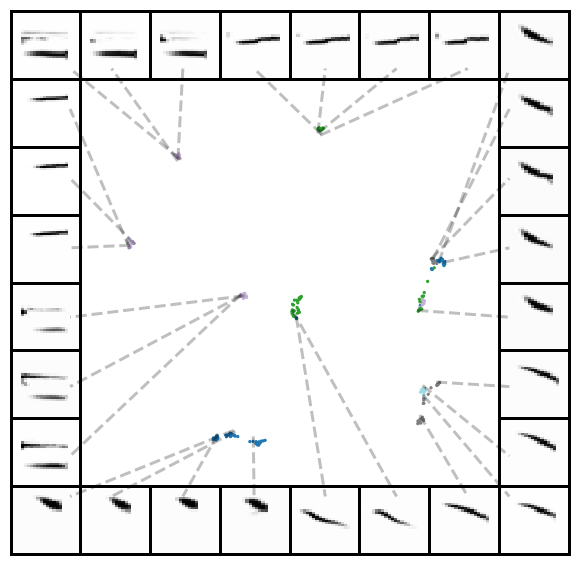

NYADIRAQBT23


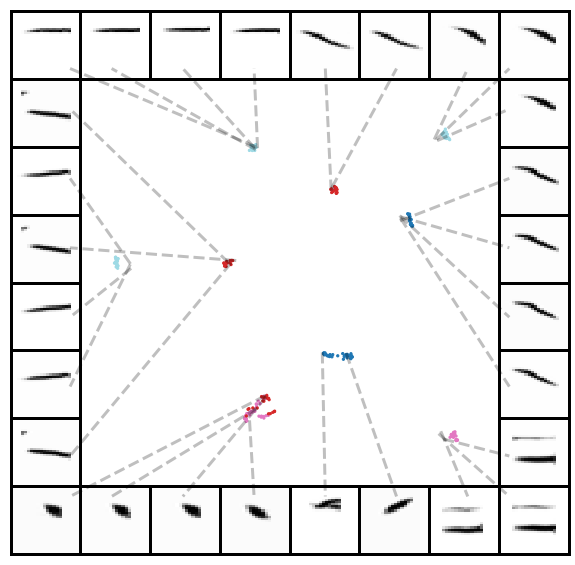

NYADIRAQSI28


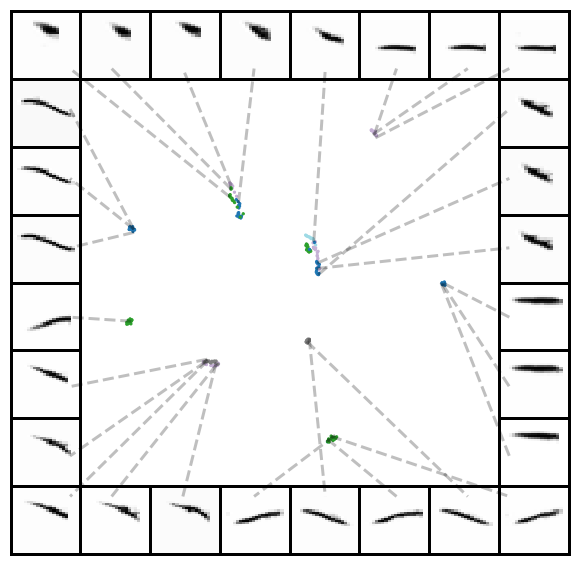

In [11]:
for idx, row in datasets.iterrows():
    syllable_df = pd.read_pickle(row['_loc'])
    embedding = np.vstack(syllable_df.umap.values)
    print(row.indv, len(embedding))
    specs = list(syllable_df.spectrogram.values)
    scatter_spec(
        embedding,
        specs,
        column_size=8,
        #x_range = [-4.5,4],
        #y_range = [-4.5,5.5],
        pal_color="hls",
        color_points=False,
        enlarge_points=0,
        figsize=(10, 10),
        range_pad = 0.15,
        scatter_kwargs = {
            'labels': syllable_df.pos_in_syllable.values,
            'alpha': 1,
            's': 5,
            'show_legend': False
        },
        matshow_kwargs = {
            'cmap': plt.cm.Greys
        },
        line_kwargs = {
            'lw':3,
            'ls':"dashed",
            'alpha':0.25,
        },
        draw_lines=True,
        n_subset= 1000,
        border_line_width = 3,

    );
    plt.show()
    #save_fig(FIGURE_DIR / 'discrete_umap' / ds, dpi=300, save_jpg=True, save_png=True)
    #break